# Importing the Libraries and Reading the Dataset

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('main_dataset.csv')

In [3]:
df.to_csv('main_dataset.csv', index=False)

In [4]:
pd.set_option('display.max_columns', None)
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Current Batch ID,N2 Batch ID,N2 Second Section Batch ID,P Batch ID,Spec ID,Current Cycle Time (nth Day),Expected Loading Date -P,Expected Harvest Date -P,Actual Loading Date - N2,Actual Harvest Date,N2 Bed ID,2nd Section Bed ID,Unique Batch Identifier,Work order Number - N2,N2 Spec Cycle Time(Hours),P Spec Cycle Time (Hours),N2 Spec Feeding Rate (mg/l/d),P Spec Feeding Rate (mg/l/d),N2 Spec Loading Density (mg/l/d),P Spec Loading Density (mg/l/d),YL Batch No,Actual YL Quantity Loaded (#),Avg. YL Mass (mg),Total YL Mass Loaded (Kg),N2 Formulation,Feed Batch No - N2,Planned N2 Feed Depth?,Actual N2 Feed Depth (cm),Actual Feed Quantity Loaded - N2 (Kgs),How N2 is being loaded?,N2 Net Type ?,N2 Loading Length?,Larvae Dosing Start Time,Larvae Dosing End Time,10M section Dosing Start Time,10M Section Dosing End Time,Actual N2 Loading Date and Time,Actual N2 10M Section Loading Date and Time,Bed Loading Start Time - N2,Bed Loading End Time - N2,Bed Loading Start Time - 10M Section N2,Bed Loading End Time - 10M Section N2,"N2 Pest: Maggots, house fly pupae, Mites, Other pests\nSpec:None (Y/N)",N2 YL Age\nSpec: 4dols (Y/N),N2 Size Distribution\n(Spec: Same size)\n(Y/N),N2 Mortality\nPresence of dead YL Spec:None (Y/N),YL Loaded GIGO Score (%),"N2 Net used\nSpec: Clean, No tears (Y/N)","N2 Net alignment (Y/N)\nSpec: No sagging, evenly aligned",N2 Net width ≥ 180cm,N2 Net Tagged?(Y/N)\nSpec: Tagged,N2 Feed Levelling (Y/N)\nSpec: Uniform Level,Wood Planks well placed?,N2 Wood plank well positioned?\nSpec:(2M partitions between sections),Has N2 YL dosing been done?,N2 Larvae evenly dostributed?,N2 Bed tagged?,N2 Tag updated correctly?,N2 Bed Loading GIGO Score (%),"10 M Section Nets\nSpec: Clean, No tears (Y/N)","10 M Section Net alignment (Y/N)\nSpec: No sagging, evenly aligned",10 M Section Net width ≥ 180cm,10M Section NetTagged?(Y/N)\nSpec: Tagged,10M Section Feed Levelling (Y/N)\nSpec: Uniform Level,10M Section Wood Planks well placed?,10M Section Wood plank well positioned?\nSpec:(2M partitions between sections),Has10M Section N2 YL dosing been done?,10M Section N2 Larvae evenly distributed?,10M Section Bed tagged?,10M Section Tag updated correctly?,10m Section N2 Bed Loading GIGO Score (%),"10M Section Pest: Maggots, house fly pupae, Mites, Other pests\nSpec:None (Y/N)",10 M Section YL Age\nSpec: 4dols (Y/N),10 M Section N2 Size Distribution\n(Spec: Same size)\n(Y/N),10 M Section Mortality\nPresence of dead YL Spec:None (Y/N),10m Section YL Loaded GIGO Score (%),N2 Actual Harvest Date,10M N2 Actual Harvest Date,"N2 Pests(Maggots, Spidereggs, mites, others) Spec: None(Y, N)","N2 Staging Depth( Height of Lavae in Bin ) Spec : <9cm (Y, N)","N2 Mortality (Presence of dead YL) Spec: None (Y, N)",N2 Purity Score (% Pure YL) Spec >=70%,N2 YL Harvest GIGO Score (%),N2 Transition Type,N2- Actual Cycle Time (Hours),Work Order Number - N2 Harvesting,N2 No of trips,N2 Aportoning End Time,N2 Full Bed Offloading Start Time,N2 Full Bed Offloading End Time,N2 Full Bed Harvesting Start Time,N2 Full Bed Harvesting End Time,10M Section Bed Offloading Start Time,10M Section Offloading End Time,10M Section Bed Harvesting Start Time,10M Section Harvesting End Time,Actual N2 Harvesting Date and Time,Actual N2 10M Section Harvesting Date and Time,Mass of N2 Sample (g),Mass of pure N2 from Sample (g),N2 Purity by Mass,Quantity of N2 harvested (Kgs),Quantity of Pure N2 harvested (Kgs),Mass of Pure N2 in Scoop 1,N2 no. in Scoop 1\n,Mass of Pure N2 in Scoop 2,N2 no. in Scoop 2\n,Mass of Pure N2 in Scoop 3,N2 no. in Scoop 3\n,Average Number of N2 in 1 g,Average Mass of N2 Larvae in Sample (mg),Total Number of N2 in Batch,N2 Survivability (%),N1-N2 Growth Multiple,Actual Harvest Refill Transfer Date - P,Larvae Dosing Start Time - P From Full beds,Larvae Dosing End Time - P From Full beds,10M section Larvae Dosing Start Time-P,10M Section Larvae Dosing End Time- P,Actual P Harvest Refil Date and Time,10 M Section Refil Date and Time,Work 

## Initial Examination of the Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Columns: 208 entries, Unnamed: 0.1 to Unnamed: 205
dtypes: float64(42), int64(2), object(164)
memory usage: 1.3+ MB


In [6]:
df.shape 

(796, 208)

In [7]:
df.drop(columns=['Unnamed: 0'], axis =1, inplace = True) #, 'Unnamed: 0.2','Unnamed: 0.1', 'Unnamed: 0.3','Unnamed: 0.4'], axis =1, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Columns: 207 entries, Unnamed: 0.1 to Unnamed: 205
dtypes: float64(42), int64(1), object(164)
memory usage: 1.3+ MB


In [9]:
df1 =df.copy()

In [10]:
#Droping the first 6 records because they are not missing at random 
df1= df1.drop(labels =[0,1,2,3,4,5,6], axis = 0)

In [11]:
# Droping further rows . More incomplete entries on the right 
f1= df1.drop(labels =[7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29], axis = 0)

In [12]:
df2=f1.copy()

In [13]:
# Checking for columns that are similar 

In [14]:
df2['N2 Second Section Batch ID'].equals(df2['N2 Batch ID'])

False

In [15]:
#Checking if other 2 columns are the same
df2['Actual Harvest date - P'].equals(df2['WL Harvested by #'])

False

In [16]:
df2['P Batch ID'].nunique()

753

In [17]:
# Dropping selected columns to reduce the data dimensionality 
df2.drop(['Current Batch ID'], axis=1, inplace =True)

In [18]:
df2.drop(['P Batch ID','Actual Loading Date - N2'], axis=1, inplace =True)

In [19]:
df2.drop(['Work order Number - N2','Planned N2 Feed Depth?','Larvae Dosing Start Time','Larvae Dosing End Time','10M section Dosing Start Time'], axis=1, inplace =True)

In [20]:
df2.drop(['Spec ID','Current Cycle Time (nth Day)'], axis=1, inplace =True)

In [21]:
df2.drop(['N2 Bed ID ','2nd  Section Bed ID ','Unique Batch Identifier','YL Batch No','YL Batch No','Feed Batch No - N2','N2 Net Type ? '], axis=1, inplace =True)

In [22]:
# At this stage, some of the columns I am about to drop can be used for visulization so let create a new df
# that we can continue droping and do the anlaysis later on the current old df should we need too 
df3= df2.copy()

In [23]:
df3.head()

,Unnamed: 0.1,N2 Batch ID,N2 Second Section Batch ID,Expected Loading Date -P,Expected Harvest Date -P,Actual Harvest Date,N2 Spec Cycle Time(Hours),P Spec Cycle Time (Hours),N2 Spec Feeding Rate (mg/l/d),P Spec Feeding Rate (mg/l/d),N2 Spec Loading Density (mg/l/d),P Spec Loading Density (mg/l/d),Actual YL Quantity Loaded (#),Avg. YL Mass (mg),Total YL Mass Loaded (Kg),N2 Formulation,Actual N2 Feed Depth (cm),Actual Feed Quantity Loaded - N2 (Kgs),How N2 is being loaded?,N2 Loading Length?,10M Section Dosing End Time,Actual N2 Loading Date and Time,Actual N2 10M Section Loading Date and Time,Bed Loading Start Time - N2,Bed Loading End Time - N2,Bed Loading Start Time - 10M Section N2,Bed Loading End Time - 10M Section N2,"N2 Pest: Maggots, house fly pupae, Mites, Other pests\nSpec:None (Y/N)",N2 YL Age\nSpec: 4dols (Y/N),N2 Size Distribution\n(Spec: Same size)\n(Y/N),N2 Mortality\nPresence of dead YL Spec:None (Y/N),YL Loaded GIGO Score (%),"N2 Net used\nSpec: Clean, No tears (Y/N)","N2 Net alignment (Y/N)\nSpec: No sagging, evenly aligned",N2 Net width ≥ 180cm,N2 Net Tagged?(Y/N)\nSpec: Tagged,N2 Feed Levelling (Y/N)\nSpec: Uniform Level,Wood Planks well placed?,N2 Wood plank well positioned?\nSpec:(2M partitions between sections),Has N2 YL dosing been done?,N2 Larvae evenly dostributed?,N2 Bed tagged?,N2 Tag updated correctly?,N2 Bed Loading GIGO Score (%),"10 M Section Nets\nSpec: Clean, No tears (Y/N)","10 M Section Net alignment (Y/N)\nSpec: No sagging, evenly aligned",10 M Section Net width ≥ 180cm,10M Section NetTagged?(Y/N)\nSpec: Tagged,10M Section Feed Levelling (Y/N)\nSpec: Uniform Level,10M Section Wood Planks well placed?,10M Section Wood plank well positioned?\nSpec:(2M partitions between sections),Has10M Section N2 YL dosing been done?,10M Section N2 Larvae evenly distributed?,10M Section Bed tagged?,10M Section Tag updated correctly?,10m Section N2 Bed Loading GIGO Score (%),"10M Section Pest: Maggots, house fly pupae, Mites, Other pests\nSpec:None (Y/N)",10 M Section YL Age\nSpec: 4dols (Y/N),10 M Section N2 Size Distribution\n(Spec: Same size)\n(Y/N),10 M Section Mortality\nPresence of dead YL Spec:None (Y/N),10m Section YL Loaded GIGO Score (%),N2 Actual Harvest Date,10M N2 Actual Harvest Date,"N2 Pests(Maggots, Spidereggs, mites, others) Spec: None(Y, N)","N2 Staging Depth( Height of Lavae in Bin ) Spec : <9cm (Y, N)","N2 Mortality (Presence of dead YL) Spec: None (Y, N)",N2 Purity Score (% Pure YL) Spec >=70%,N2 YL Harvest GIGO Score (%),N2 Transition Type,N2- Actual Cycle Time (Hours),Work Order Number - N2 Harvesting,N2 No of trips,N2 Aportoning End Time,N2 Full Bed Offloading Start Time,N2 Full Bed Offloading End Time,N2 Full Bed Harvesting Start Time,N2 Full Bed Harvesting End Time,10M Section Bed Offloading Start Time,10M Section Offloading End Time,10M Section Bed Harvesting Start Time,10M Section Harvesting End Time,Actual N2 Harvesting Date and Time,Actual N2 10M Section Harvesting Date and Time,Mass of N2 Sample (g),Mass of pure N2 from Sample (g),N2 Purity by Mass,Quantity of N2 harvested (Kgs),Quantity of Pure N2 harvested (Kgs),Mass of Pure N2 in Scoop 1,N2 no. in Scoop 1\n,Mass of Pure N2 in Scoop 2,N2 no. in Scoop 2\n,Mass of Pure N2 in Scoop 3,N2 no. in Scoop 3\n,Average Number of N2 in 1 g,Average Mass of N2 Larvae in Sample (mg),Total Number of N2 in Batch,N2 Survivability (%),N1-N2 Growth Multiple,Actual Harvest Refill Transfer Date - P,Larvae Dosing Start Time - P From Full beds,Larvae Dosing End Time - P From Full beds,10M section Larvae Dosing Start Time-P,10M Section Larvae Dosing End Time- P,Actual P Harvest Refil Date and Time,10 M Section Refil Date and Time,Work order Number - P,P Bed ID,Feed Batch No - P,P Formulation,P Loading Start Time,P Loading End Time,Number of Planned Scoops,Actual number of scoops loaded,Actual Feed Quantity Loaded - P (Kgs),P Loaded Length (m),Planned P depth (cm),P Actual Feed Depth (cm),How P is being loaded?,WL Age\nSpec: 9dols (Y/N),P Size Distribut

In [24]:
# Subseting the data frame 
df4=df3[['Actual Harvest Date ','Actual Harvest date - P','N2 Spec Cycle Time(Hours)','P Spec Cycle Time (Hours)', 'N2 Spec Feeding Rate (mg/l/d)','P Spec Feeding Rate (mg/l/d)', 'N2 Spec Loading Density (mg/l/d)','P Spec Loading Density (mg/l/d)', 'Actual YL Quantity Loaded (#)', 'Avg. YL Mass (mg)', 'Total YL Mass Loaded (Kg)','N2 Formulation','Actual N2 Feed Depth (cm)','Actual Feed Quantity Loaded - N2 (Kgs)','How N2 is being loaded?','N2 Loading Length?','Bed Loading Start Time - N2','Bed Loading End Time - N2','YL Loaded  GIGO Score (%)','N2 Bed Loading GIGO Score (%)','10m Section N2 Bed Loading GIGO Score (%)','N2 Purity Score (% Pure YL) Spec >=70%','N2 YL Harvest GIGO Score (%)','N2 Transition Type ','N2- Actual Cycle Time (Hours)','Mass of N2 Sample (g)','Mass of pure N2 from Sample (g)','Average Number of N2 in 1 g','Average Mass of N2 Larvae in Sample  (mg)','Total Number of N2 in Batch ','N2 Survivability (%)','P Bed ID','P Formulation','Actual Feed Quantity Loaded - P (Kgs)','P Loaded Length (m)','Planned P depth (cm)','P Actual Feed Depth (cm)','How P is being loaded?','P YL GIGO Score (%)','P Bed Loading GIGO Score (%)','WL Harvest GIGO Score (%)','P - Actual Cycle Time Hours','Quantity of WL harvested at 85% purity (Kgs)','Average Mass of harvested WL (mg)','Actual  N2 Feeding rate (mg/YL-Day)','WL Harvested by #','N2-P Cycle','Total feed used (Kgs) ']]

In [25]:
df5=df4.copy()

In [26]:
# Because N2 spec cycle time and P spec cycle have constant entries, we drop them 
df5.drop(['N2 Spec Cycle Time(Hours)','P Spec Cycle Time (Hours)'], axis = 1, inplace = True)

In [27]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 30 to 795
Data columns (total 46 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Actual Harvest Date                           731 non-null    object 
 1   Actual Harvest date - P                       731 non-null    object 
 2   N2 Spec Feeding Rate (mg/l/d)                 762 non-null    float64
 3   P Spec Feeding Rate (mg/l/d)                  762 non-null    float64
 4   N2 Spec Loading Density (mg/l/d)              762 non-null    float64
 5   P Spec Loading Density (mg/l/d)               762 non-null    float64
 6   Actual YL Quantity Loaded (#)                 763 non-null    object 
 7   Avg. YL Mass (mg)                             756 non-null    float64
 8   Total YL Mass Loaded (Kg)                     756 non-null    float64
 9   N2 Formulation                                763 non-null    ob

In [28]:
#Checking if other 2 columns are the same
df5['Actual Harvest date - P'].equals(df5['Actual Harvest Date '])

False

In [29]:
# Droping columns that will not be useful in imputation and prediction 
df5.drop(['Actual Harvest Date '], axis = 1, inplace = True)

## Data Cleaning 

In [30]:
## Remobing special characters from Columns that should be of type integer
df5['YL Loaded  GIGO Score (%)']= df5['YL Loaded  GIGO Score (%)'].str.replace('%', '')
df5['N2 Bed Loading GIGO Score (%)']= df5['N2 Bed Loading GIGO Score (%)'].str.replace('%', '')
df5['10m Section N2 Bed Loading GIGO Score (%)']= df5['10m Section N2 Bed Loading GIGO Score (%)'].str.replace('%', '')
df5['P YL GIGO Score (%)']= df5['P YL GIGO Score (%)'].str.replace('%', '')
df5['P Bed Loading GIGO Score (%)']= df5['P Bed Loading GIGO Score (%)'].str.replace('%', '')
df5['WL Harvest GIGO Score (%)']= df5['WL Harvest GIGO Score (%)'].str.replace('%', '')
df5['Total feed used (Kgs) ']= df5['Total feed used (Kgs) '].str.replace(',', '')
df5['Actual YL Quantity Loaded (#)']= df5['Actual YL Quantity Loaded (#)'].str.replace(',', '')
df5['N2 YL Harvest GIGO Score (%)']= df5['N2 YL Harvest GIGO Score (%)'].str.replace('%', '')


In [31]:

df5['YL Loaded  GIGO Score (%)']=df5['YL Loaded  GIGO Score (%)'].astype('float')
df5['N2 Bed Loading GIGO Score (%)']=df5['N2 Bed Loading GIGO Score (%)'].astype('float')
df5['10m Section N2 Bed Loading GIGO Score (%)']=df5['10m Section N2 Bed Loading GIGO Score (%)'].astype('float')
df5['P YL GIGO Score (%)']=df5['P YL GIGO Score (%)'].astype('float')
df5['P Bed Loading GIGO Score (%)']=df5['P Bed Loading GIGO Score (%)'].astype('float')
df5['WL Harvest GIGO Score (%)']=df5['WL Harvest GIGO Score (%)'].astype('float')
df5['Total feed used (Kgs) ']=df5['Total feed used (Kgs) '].astype('float')
df5['Actual YL Quantity Loaded (#)']=df5['Actual YL Quantity Loaded (#)'].astype('float')
df5['N2 YL Harvest GIGO Score (%)']=df5['N2 YL Harvest GIGO Score (%)'].astype('float')


In [32]:
df5['N2- Actual Cycle Time (Hours)'].replace({'#VALUE!': 5.0}, inplace=True)

df5['N2- Actual Cycle Time (Hours)']=df5['N2- Actual Cycle Time (Hours)'].astype('float')
df5['Mass of N2 Sample (g)']= df5['Mass of N2 Sample (g)'].str.replace(',', '')
df5['Mass of N2 Sample (g)']=df5['Mass of N2 Sample (g)'].astype('float')
df5['Mass of pure N2 from Sample (g)']=df5['Mass of pure N2 from Sample (g)'].str.replace(',', '')
df5['Mass of pure N2 from Sample (g)']=df5['Mass of pure N2 from Sample (g)'].astype('float')
df5['Quantity of WL harvested at 85% purity (Kgs)']=df5['Quantity of WL harvested at 85% purity (Kgs)'].str.replace(',', '')
df5['Quantity of WL harvested at 85% purity (Kgs)']=df5['Quantity of WL harvested at 85% purity (Kgs)'].astype('float')
df5['N2-P Cycle'].replace({'44,780.604':8.163, '44,774.743':8.277, '44,757.745':'8.045'}, inplace=True)
df5['N2-P Cycle']=df5['N2-P Cycle'].astype('float')
df5['Actual Feed Quantity Loaded - N2 (Kgs)']= df5['Actual Feed Quantity Loaded - N2 (Kgs)'].str.replace(',', '')
df5['Actual Feed Quantity Loaded - N2 (Kgs)']=df5['Actual Feed Quantity Loaded - N2 (Kgs)'].astype('float')

In [33]:
df5['Actual Feed Quantity Loaded - P (Kgs)']= df5['Actual Feed Quantity Loaded - P (Kgs)'].str.replace(',', '')
df5['Actual Feed Quantity Loaded - P (Kgs)']=df5['Actual Feed Quantity Loaded - P (Kgs)'].astype('float')

In [34]:
# from the overview, we drop further columns that we will not need 
df6=df5.copy()
df6.drop(['WL Harvested by #','N2 Survivability (%)','P Bed ID','Bed Loading Start Time - N2','Bed Loading End Time - N2'], axis = 1, inplace = True)

In [35]:
# investigating why this column is showing up as an object 
df6['Total Number of N2 in Batch '].unique()

array([nan, '10,964,642', '7,118,957', '7,455,517', '11,987,923',
       '10,047,331', '9,824,106', '6,773,310', '16,843,620', '5,700,550',
       '14,371,277', '22,632,507'], dtype=object)

In [36]:
# Fixing the proplem 
df6['Total Number of N2 in Batch ']= df6['Total Number of N2 in Batch '].str.replace(',', '')
df6['Total Number of N2 in Batch ']=df6['Total Number of N2 in Batch '].astype('float')


In [37]:
df6.head()

,Actual Harvest date - P,N2 Spec Feeding Rate (mg/l/d),P Spec Feeding Rate (mg/l/d),N2 Spec Loading Density (mg/l/d),P Spec Loading Density (mg/l/d),Actual YL Quantity Loaded (#),Avg. YL Mass (mg),Total YL Mass Loaded (Kg),N2 Formulation,Actual N2 Feed Depth (cm),Actual Feed Quantity Loaded - N2 (Kgs),How N2 is being loaded?,N2 Loading Length?,YL Loaded GIGO Score (%),N2 Bed Loading GIGO Score (%),10m Section N2 Bed Loading GIGO Score (%),N2 Purity Score (% Pure YL) Spec >=70%,N2 YL Harvest GIGO Score (%),N2 Transition Type,N2- Actual Cycle Time (Hours),Mass of N2 Sample (g),Mass of pure N2 from Sample (g),Average Number of N2 in 1 g,Average Mass of N2 Larvae in Sample (mg),Total Number of N2 in Batch,P Formulation,Actual Feed Quantity Loaded - P (Kgs),P Loaded Length (m),Planned P depth (cm),P Actual Feed Depth (cm),How P is being loaded?,P YL GIGO Score (%),P Bed Loading GIGO Score (%),WL Harvest GIGO Score (%),P - Actual Cycle Time Hours,Quantity of WL harvested at 85% purity (Kgs),Average Mass of harvested WL (mg),Actual N2 Feeding rate (mg/YL-Day),N2-P Cycle,Total feed used (Kgs)
30,NaN,65.0,110.0,200000.0,200000.0,17785000.0,2.36,41.97,Coke,8.6,5781.0,Mechanical,61.3,75.0,100.0,100.0,N,75.0,Harvest Separation and Refill,5.04,731.86,502.98,18.0,55.5,NaN,Super M,4402.0,46.0,NaN,8.0,Mechanical,67.0,NaN,NaN,NaN,NaN,NaN,64.5,NaN,10183.0
31,NaN,65.0,110.0,200000.0,200000.0,17785000.0,2.31,41.08,Coke,8.6,5781.0,Mechanical,61.3,75.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,65.0,110.0,200000.0,200000.0,17785000.0,2.33,41.44,Coke,8.4,5781.0,Mechanical,61.3,75.0,100.0,100.0,NaN,100.0,Harvest Separation and Refill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,65.0,110.0,200000.0,200000.0,4858044.0,2.37,11.51,Coke,8.0,1579.0,Mechanical,16.8,75.0,100.0,NaN,N,75.0,Harvest Separation and Refill,5.21,658.13,455.97,16.8,59.5,NaN,Super M,1202.0,12.6,NaN,7.6,Mechanical,67.0,82.0,NaN,NaN,NaN,NaN,62.4,NaN,2781.0
34,NaN,65.0,110.0,200000.0,200000.0,17785000.0,2.35,41.79,Coke,8.0,5781.0,Mechanical,61.3,75.0,100.0,100.0,N,75.0,Harvest Separation and Refill,5.12,735.68,502.81,15.9,62.9,NaN,Super M,4402.0,46.0,NaN,7.7,Mechanical,67.0,82.0,NaN,NaN,NaN,NaN,63.4,NaN,10183.0


# Exploratory Data Analysis

### Summary Statistics 

In [38]:
df6.describe().T

,count,mean,std,min,25%,50%,75%,max
N2 Spec Feeding Rate (mg/l/d),762.0,6.647375e+01,4.506380e+00,65.000,6.500000e+01,6.500000e+01,6.500000e+01,9.000000e+01
P Spec Feeding Rate (mg/l/d),762.0,1.111811e+02,5.631828e+00,110.000,1.100000e+02,1.100000e+02,1.100000e+02,1.500000e+02
N2 Spec Loading Density (mg/l/d),762.0,2.000000e+05,0.000000e+00,200000.000,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05
P Spec Loading Density (mg/l/d),762.0,2.000000e+05,0.000000e+00,200000.000,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05
Actual YL Quantity Loaded (#),763.0,1.500835e+07,4.861191e+06,82179.000,1.533269e+07,1.778500e+07,1.778500e+07,1.778500e+07
Avg. YL Mass (mg),756.0,2.395185e+00,1.416398e-01,1.980,2.320000e+00,2.360000e+00,2.430000e+00,3.430000e+00
Total YL Mass Loaded (Kg),756.0,3.603052e+01,1.146367e+01,0.190,3.718750e+01,4.109000e+01,4.197000e+01,4.998000e+01
Actual N2 Feed Depth (cm),761.0,8.367135e+00,8.904002e-01,4.040,8.000000e+00,8.300000e+00,8.600000e+00,1.300000e+01
Actual Feed Quantity Loaded - N2 (Kgs),762.0,5.015907e+03,1.709648e+03,21.000,5.022000e+03,5.781000e+03,5.781000e+03,8.003000e+03
N2 Loading Length?,763.0,5.165596e+01,1.673158e+01,0.300,5.200000e+01,6.130000e+01,6.130000e+01,6.200000e+01


### Observations 

- The  minimum and maximum average mass of harvested WL is approximetly 48.2 and 159mg respectively
- The mean N2-P Cycle is roughly 8 days with the maximum being 14 days 
- Approximetly 75% of WL harvested at 85% purity wieghs 858kg

### Data Distribution

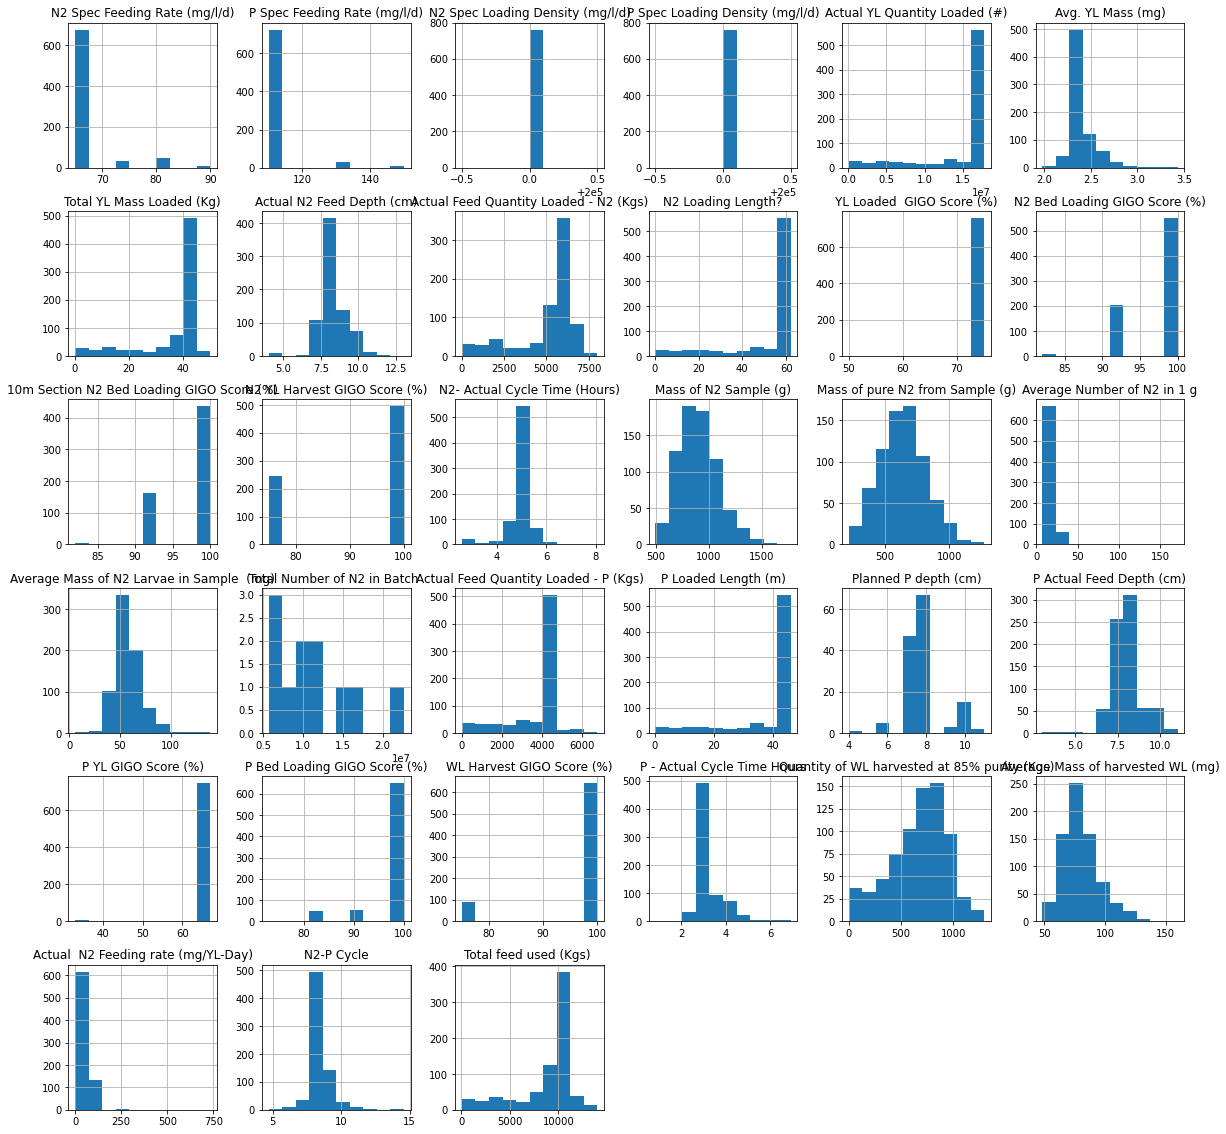

In [39]:
# Checking for the data distribution 
df6.hist(figsize=(20,20))
plt.show()

### Observations 
- Mass of pure N2 follows a normal distribution 
- Quanity of WL harvested at 85% purity, Actual YL larvae loaded, Total feed used, actual feed quanityt loaded, and Total Yl mass loaded are highily skeweed to the left 
- Perform the necessary transformations


In [40]:
df6.describe(include='object')

,Actual Harvest date - P,N2 Formulation,How N2 is being loaded?,N2 Purity Score (% Pure YL) Spec >=70%,N2 Transition Type,P Formulation,How P is being loaded?
count,731,763,763,727,743,752,753
unique,183,11,2,2,2,16,2
top,24-Aug-2022,Coke,Mechanical,Y,Harvest Separation and Refill,Super M,Mechanical
freq,11,472,627,481,736,414,646


## Observations 
- The loading process is mostly mechanical 
- Coke and Super M are the top formulations under the N2 and P formulations 
- The p phase had 16 different formulations while the N2 phase has 11 formulations 

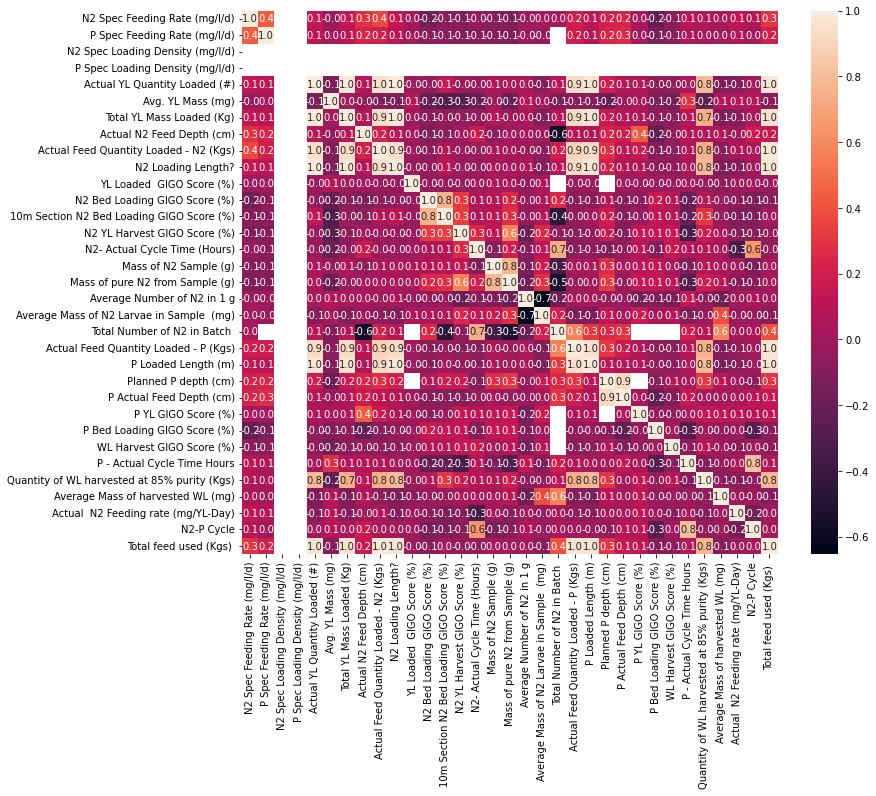

In [41]:
# heat map to investiage correlations
plt.figure(figsize=(12,10))
sns.heatmap(df6.corr(),annot=True,fmt='.1f')
plt.show()

## Observations 
- Thare is a strong positive correlation (0.8) between loading lenght and quantity of WL harvested, pointing to a significant relatinship between the two variablies. 
- The amount of feed used is also highly correllated (0.9) with the total YL mass loaded. This is to be expected as it is reasonable to for the amount of feed used to be depndent on the quanity of YL mass. 
- There is a strong negative correlation (-0.1) between the average mass of WL harvested and the Actual feed Quanity loaded at the N2 phase 

In [42]:
# Exploring the target variable
# using a group by approach to understand the mean quanity  harvested using the different formulations 
df6.groupby('P Formulation')['Quantity of WL harvested at 85% purity (Kgs)'].mean()

P Formulation
Alvaro          474.500000
Batman          541.562500
F005            599.173077
F011            557.818182
F076            581.400000
Marigold        692.464286
Powerade        651.333333
Rockstar        667.000000
Shortcake       479.500000
Star trek       285.666667
Steri Stumpi    627.894737
Stoney          646.600000
Sungold         445.692308
Super M         725.213930
Waridi          680.692308
Yogi Sip        439.000000
Name: Quantity of WL harvested at 85% purity (Kgs), dtype: float64

### Observations
- It can be observed that the maximum average quantity of harverst (725 kgs) is achieved when using Super M while the minimum is recorded when using Star Trek (285 kgs)

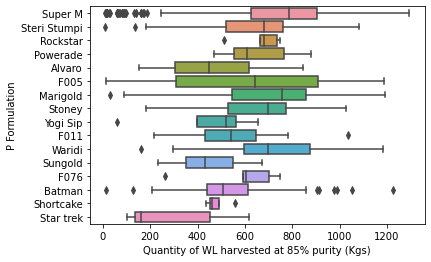

In [43]:
# Here is a chart to visualize that
sns.boxplot(y=df6['P Formulation'], x =df6['Quantity of WL harvested at 85% purity (Kgs)'])
plt.show()

### Observations
- The chat is inline with the information derived earlier
- Possible outliers present in the data 

In [44]:
df6.groupby('N2 Formulation')['Quantity of WL harvested at 85% purity (Kgs)'].mean()

N2 Formulation
Coke            725.642222
F011            661.600000
F077            455.166667
Fanta           619.338235
Fruit loops     257.333333
Jelly tots      744.500000
Miranda         667.000000
Rossy           303.750000
Sour worms      567.594595
Sprite          617.266667
Steri Stumpi    543.428571
Name: Quantity of WL harvested at 85% purity (Kgs), dtype: float64

### Observations 
- The maximum average quanity of harvest is achieved under the Jelly tots diet (744kgs) while Fruit loops give the least quanity of harvest (257 kgs).

### Encoding Categorical data & Creating new Features 

In [45]:
# starting with P Formulation 
df7=df6.copy()
df7['P Formulation'].unique()

array(['Super M', nan, 'Steri Stumpi', 'Rockstar', 'Powerade', 'Alvaro',
       'F005', 'Marigold', 'Stoney', 'Yogi Sip', 'F011', 'Waridi',
       'Sungold', 'F076', 'Batman', 'Shortcake', 'Star trek'],
      dtype=object)

### One Hot Encoding 

In [46]:
# One hot encoding of selected categorical variables 
df7 = pd.get_dummies(df7, columns=['N2 Formulation', 'P Formulation'])


In [47]:
df7.shape

(766, 65)

In [48]:
#since we have p actual depth, we can drop p depth ( has high number of missings)
df7.drop(['Planned P depth (cm)','Total Number of N2 in Batch '], axis = 1, inplace=True)

In [49]:
df7['How N2 is being loaded?']=df7['How N2 is being loaded?'].fillna(df7['How N2 is being loaded?'].mode())
df7['N2 Transition Type ']=df7['N2 Transition Type '].fillna(df7['N2 Transition Type '].mode()[0])
df7['How P is being loaded?']=df7['How P is being loaded?'].fillna(df7['How P is being loaded?'].mode()[0])
df7['N2 Purity Score (% Pure YL) Spec >=70%']=df7['N2 Purity Score (% Pure YL) Spec >=70%'].fillna(df7['N2 Purity Score (% Pure YL) Spec >=70%'].mode()[0])

In [50]:
df7 = pd.get_dummies(df7, columns=['How N2 is being loaded?', 'N2 Transition Type ','How P is being loaded?','N2 Purity Score (% Pure YL) Spec >=70%'], drop_first=True)

In [51]:
df8 = df7.copy()

In [52]:
df8['Quantity of WL harvested at 85% purity (Kgs)'].argmax()

626

In [53]:
df8.iloc[626]

Actual Harvest date - P                              24-Mar-2022
N2 Spec Feeding Rate (mg/l/d)                               65.0
P Spec Feeding Rate (mg/l/d)                               110.0
N2 Spec Loading Density (mg/l/d)                        200000.0
P Spec Loading Density (mg/l/d)                         200000.0
                                                        ...     
P Formulation_Yogi Sip                                         0
How N2 is being loaded?_Mechanical                             1
N2 Transition Type _Harvest Separation and Refill              1
How P is being loaded?_Mechanical                              1
N2 Purity Score (% Pure YL) Spec >=70%_Y                       0
Name: 656, Length: 63, dtype: object

In [54]:
df8['Quantity of WL harvested at 85% purity (Kgs)'].argmin()

680

In [55]:
df8.iloc[680]

Actual Harvest date - P                              11 Mar 2022
N2 Spec Feeding Rate (mg/l/d)                               65.0
P Spec Feeding Rate (mg/l/d)                               110.0
N2 Spec Loading Density (mg/l/d)                        200000.0
P Spec Loading Density (mg/l/d)                         200000.0
                                                        ...     
P Formulation_Yogi Sip                                         0
How N2 is being loaded?_Mechanical                             1
N2 Transition Type _Harvest Separation and Refill              1
How P is being loaded?_Mechanical                              1
N2 Purity Score (% Pure YL) Spec >=70%_Y                       0
Name: 710, Length: 63, dtype: object

In [56]:
df9=df8.copy()

In [57]:
df8.columns

Index(['Actual Harvest date - P', 'N2 Spec Feeding Rate (mg/l/d)',
       'P Spec Feeding Rate (mg/l/d)', 'N2 Spec Loading Density (mg/l/d)',
       'P Spec Loading Density (mg/l/d)', 'Actual YL Quantity Loaded (#)',
       'Avg. YL Mass (mg)', 'Total YL Mass Loaded (Kg)',
       'Actual N2 Feed Depth (cm)', 'Actual Feed Quantity Loaded - N2 (Kgs)',
       'N2 Loading Length?', 'YL Loaded  GIGO Score (%)',
       'N2 Bed Loading GIGO Score (%)',
       '10m Section N2 Bed Loading GIGO Score (%)',
       'N2 YL Harvest GIGO Score (%)', 'N2- Actual Cycle Time (Hours)',
       'Mass of N2 Sample (g)', 'Mass of pure N2 from Sample (g)',
       'Average Number of N2 in 1 g',
       'Average Mass of N2 Larvae in Sample  (mg)',
       'Actual Feed Quantity Loaded - P (Kgs)', 'P Loaded Length (m)',
       'P Actual Feed Depth (cm)', 'P YL GIGO Score (%)',
       'P Bed Loading GIGO Score (%)', 'WL Harvest GIGO Score (%)',
       'P - Actual Cycle Time Hours',
       'Quantity of WL harvested a

In [58]:
df9.head()

,Actual Harvest date - P,N2 Spec Feeding Rate (mg/l/d),P Spec Feeding Rate (mg/l/d),N2 Spec Loading Density (mg/l/d),P Spec Loading Density (mg/l/d),Actual YL Quantity Loaded (#),Avg. YL Mass (mg),Total YL Mass Loaded (Kg),Actual N2 Feed Depth (cm),Actual Feed Quantity Loaded - N2 (Kgs),N2 Loading Length?,YL Loaded GIGO Score (%),N2 Bed Loading GIGO Score (%),10m Section N2 Bed Loading GIGO Score (%),N2 YL Harvest GIGO Score (%),N2- Actual Cycle Time (Hours),Mass of N2 Sample (g),Mass of pure N2 from Sample (g),Average Number of N2 in 1 g,Average Mass of N2 Larvae in Sample (mg),Actual Feed Quantity Loaded - P (Kgs),P Loaded Length (m),P Actual Feed Depth (cm),P YL GIGO Score (%),P Bed Loading GIGO Score (%),WL Harvest GIGO Score (%),P - Actual Cycle Time Hours,Quantity of WL harvested at 85% purity (Kgs),Average Mass of harvested WL (mg),Actual N2 Feeding rate (mg/YL-Day),N2-P Cycle,Total feed used (Kgs),N2 Formulation_Coke,N2 Formulation_F011,N2 Formulation_F077,N2 Formulation_Fanta,N2 Formulation_Fruit loops,N2 Formulation_Jelly tots,N2 Formulation_Miranda,N2 Formulation_Rossy,N2 Formulation_Sour worms,N2 Formulation_Sprite,N2 Formulation_Steri Stumpi,P Formulation_Alvaro,P Formulation_Batman,P Formulation_F005,P Formulation_F011,P Formulation_F076,P Formulation_Marigold,P Formulation_Powerade,P Formulation_Rockstar,P Formulation_Shortcake,P Formulation_Star trek,P Formulation_Steri Stumpi,P Formulation_Stoney,P Formulation_Sungold,P Formulation_Super M,P Formulation_Waridi,P Formulation_Yogi Sip,How N2 is being loaded?_Mechanical,N2 Transition Type _Harvest Separation and Refill,How P is being loaded?_Mechanical,N2 Purity Score (% Pure YL) Spec >=70%_Y
30,NaN,65.0,110.0,200000.0,200000.0,17785000.0,2.36,41.97,8.6,5781.0,61.3,75.0,100.0,100.0,75.0,5.04,731.86,502.98,18.0,55.5,4402.0,46.0,8.0,67.0,NaN,NaN,NaN,NaN,NaN,64.5,NaN,10183.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0
31,NaN,65.0,110.0,200000.0,200000.0,17785000.0,2.31,41.08,8.6,5781.0,61.3,75.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
32,NaN,65.0,110.0,200000.0,200000.0,17785000.0,2.33,41.44,8.4,5781.0,61.3,75.0,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
33,NaN,65.0,110.0,200000.0,200000.0,4858044.0,2.37,11.51,8.0,1579.0,16.8,75.0,100.0,NaN,75.0,5.21,658.13,455.97,16.8,59.5,1202.0,12.6,7.6,67.0,82.0,NaN,NaN,NaN,NaN,62.4,NaN,2781.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0
34,NaN,65.0,110.0,200000.0,200000.0,17785000.0,2.35,41.79,8.0,5781.0,61.3,75.0,100.0,100.0,75.0,5.12,735.68,502.81,15.9,62.9,4402.0,46.0,7.7,67.0,82.0,NaN,NaN,NaN,NaN,63.4,NaN,10183.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0


In [59]:
df9['Actual Harvest date - P'].fillna('7-Sep-2022', inplace=True)

In [60]:
# Because Actual Harvest dat -p is the acutal data of harvest we rename the column
df9.rename(columns = {'Actual Harvest date - P':'Actual Harvest Date '}, inplace = True)

## Transforming the Date Column

In [61]:
df10=df9[['Actual Harvest Date ']]

In [62]:
df10.head()

,Actual Harvest Date
30,7-Sep-2022
31,7-Sep-2022
32,7-Sep-2022
33,7-Sep-2022
34,7-Sep-2022


In [63]:
dfx=df10.copy()


In [64]:
dfx['Actual Harvest Date '] = pd.to_datetime(dfx['Actual Harvest Date '])

In [65]:
dfx.head(5)

,Actual Harvest Date
30,2022-09-07
31,2022-09-07
32,2022-09-07
33,2022-09-07
34,2022-09-07


In [66]:
import datetime as dt

In [67]:
df9.drop(columns=['Actual Harvest Date '], axis=1, inplace=True)

## Dealing with Missing Data  

### KNN Imputation (Cluster based)

In [68]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df9= pd.DataFrame(imputer.fit_transform(df9),columns = df9.columns)

## Checking and Correcting for Outliers 

#### Possible outliers columns based on the summary statistics 
- Actual N2 Feed Depth (cm)
- Actual Feed Quantity Loaded - N2 (Kgs)
- N2 Loading Length?
- N2- Actual Cycle Time (Hours)
- Actual Feed Quantity Loaded - P (Kgs)
- P Loaded Length (m)
- P Actual Feed Depth (cm)
- P - Actual Cycle Time Hours
- Quantity of WL harvested at 85% purity (Kgs)
- Actual N2 Feeding rate (mg/YL-Day)
- N2-P Cycle
- Total feed used (Kgs)


#### Using Box plot to vizulize outliers 

<AxesSubplot:>

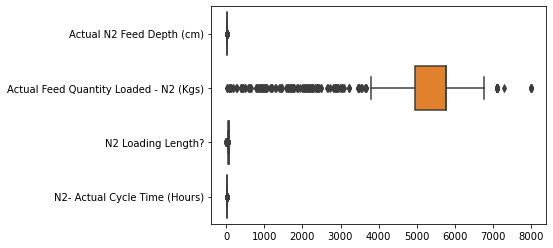

In [69]:
sns.boxplot(data=df9[['Actual N2 Feed Depth (cm)','Actual Feed Quantity Loaded - N2 (Kgs)', 'N2 Loading Length?','N2- Actual Cycle Time (Hours)']], orient="h")

<AxesSubplot:xlabel='Actual N2 Feed Depth (cm)'>

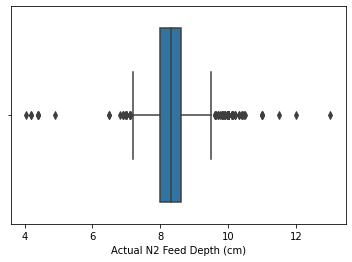

In [70]:
sns.boxplot(df9['Actual N2 Feed Depth (cm)'])

<AxesSubplot:xlabel='Actual Feed Quantity Loaded - N2 (Kgs)'>

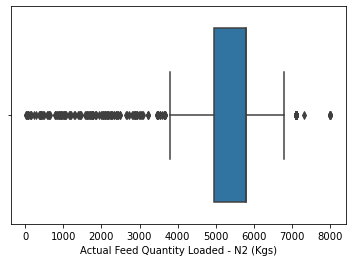

In [71]:
sns.boxplot(df9['Actual Feed Quantity Loaded - N2 (Kgs)'])

<AxesSubplot:xlabel='N2- Actual Cycle Time (Hours)'>

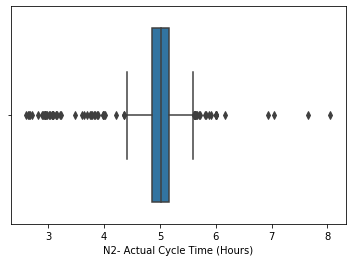

In [72]:
sns.boxplot(df9['N2- Actual Cycle Time (Hours)'])

<AxesSubplot:xlabel='P Loaded Length (m)'>

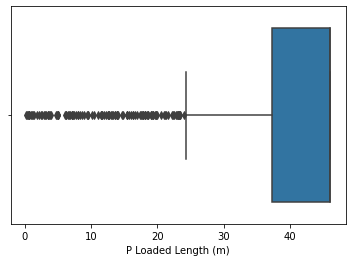

In [73]:
sns.boxplot(df9['P Loaded Length (m)'])

### Using Isolation Forest to Identify outliers 

In [74]:
df10=df9.copy()

In [75]:
df10.shape

(766, 62)

In [76]:
from sklearn.ensemble import IsolationForest

iforest = IsolationForest().fit(df10)

df10["outlier"] = iforest.predict(df10) 

In [77]:
df10.head()

,N2 Spec Feeding Rate (mg/l/d),P Spec Feeding Rate (mg/l/d),N2 Spec Loading Density (mg/l/d),P Spec Loading Density (mg/l/d),Actual YL Quantity Loaded (#),Avg. YL Mass (mg),Total YL Mass Loaded (Kg),Actual N2 Feed Depth (cm),Actual Feed Quantity Loaded - N2 (Kgs),N2 Loading Length?,YL Loaded GIGO Score (%),N2 Bed Loading GIGO Score (%),10m Section N2 Bed Loading GIGO Score (%),N2 YL Harvest GIGO Score (%),N2- Actual Cycle Time (Hours),Mass of N2 Sample (g),Mass of pure N2 from Sample (g),Average Number of N2 in 1 g,Average Mass of N2 Larvae in Sample (mg),Actual Feed Quantity Loaded - P (Kgs),P Loaded Length (m),P Actual Feed Depth (cm),P YL GIGO Score (%),P Bed Loading GIGO Score (%),WL Harvest GIGO Score (%),P - Actual Cycle Time Hours,Quantity of WL harvested at 85% purity (Kgs),Average Mass of harvested WL (mg),Actual N2 Feeding rate (mg/YL-Day),N2-P Cycle,Total feed used (Kgs),N2 Formulation_Coke,N2 Formulation_F011,N2 Formulation_F077,N2 Formulation_Fanta,N2 Formulation_Fruit loops,N2 Formulation_Jelly tots,N2 Formulation_Miranda,N2 Formulation_Rossy,N2 Formulation_Sour worms,N2 Formulation_Sprite,N2 Formulation_Steri Stumpi,P Formulation_Alvaro,P Formulation_Batman,P Formulation_F005,P Formulation_F011,P Formulation_F076,P Formulation_Marigold,P Formulation_Powerade,P Formulation_Rockstar,P Formulation_Shortcake,P Formulation_Star trek,P Formulation_Steri Stumpi,P Formulation_Stoney,P Formulation_Sungold,P Formulation_Super M,P Formulation_Waridi,P Formulation_Yogi Sip,How N2 is being loaded?_Mechanical,N2 Transition Type _Harvest Separation and Refill,How P is being loaded?_Mechanical,N2 Purity Score (% Pure YL) Spec >=70%_Y,outlier
0,65.0,110.0,200000.0,200000.0,17785000.0,2.36,41.97,8.6,5781.0,61.3,75.0,100.0,100.0,75.0,5.040,731.86,502.980,18.00,55.50,4402.0,46.0,8.00,67.0,96.4,95.0,2.942,787.4,80.820,64.5,8.3614,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1
1,65.0,110.0,200000.0,200000.0,17785000.0,2.31,41.08,8.6,5781.0,61.3,75.0,100.0,100.0,100.0,5.180,870.62,680.672,17.30,59.56,4402.0,46.0,7.70,67.0,98.2,100.0,2.840,920.0,86.638,62.8,8.1276,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1
2,65.0,110.0,200000.0,200000.0,17785000.0,2.33,41.44,8.4,5781.0,61.3,75.0,100.0,100.0,100.0,5.152,854.20,667.048,16.84,60.38,4402.0,46.0,7.48,67.0,98.2,100.0,2.850,780.4,85.278,63.1,8.1422,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1
3,65.0,110.0,200000.0,200000.0,4858044.0,2.37,11.51,8.0,1579.0,16.8,75.0,100.0,100.0,75.0,5.210,658.13,455.970,16.80,59.50,1202.0,12.6,7.60,67.0,82.0,100.0,2.966,493.2,77.964,62.4,8.0844,2781.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1
4,65.0,110.0,200000.0,200000.0,17785000.0,2.35,41.79,8.0,5781.0,61.3,75.0,100.0,100.0,75.0,5.120,735.68,502.810,15.90,62.90,4402.0,46.0,7.70,67.0,82.0,95.0,2.942,787.4,80.820,63.4,8.3614,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1


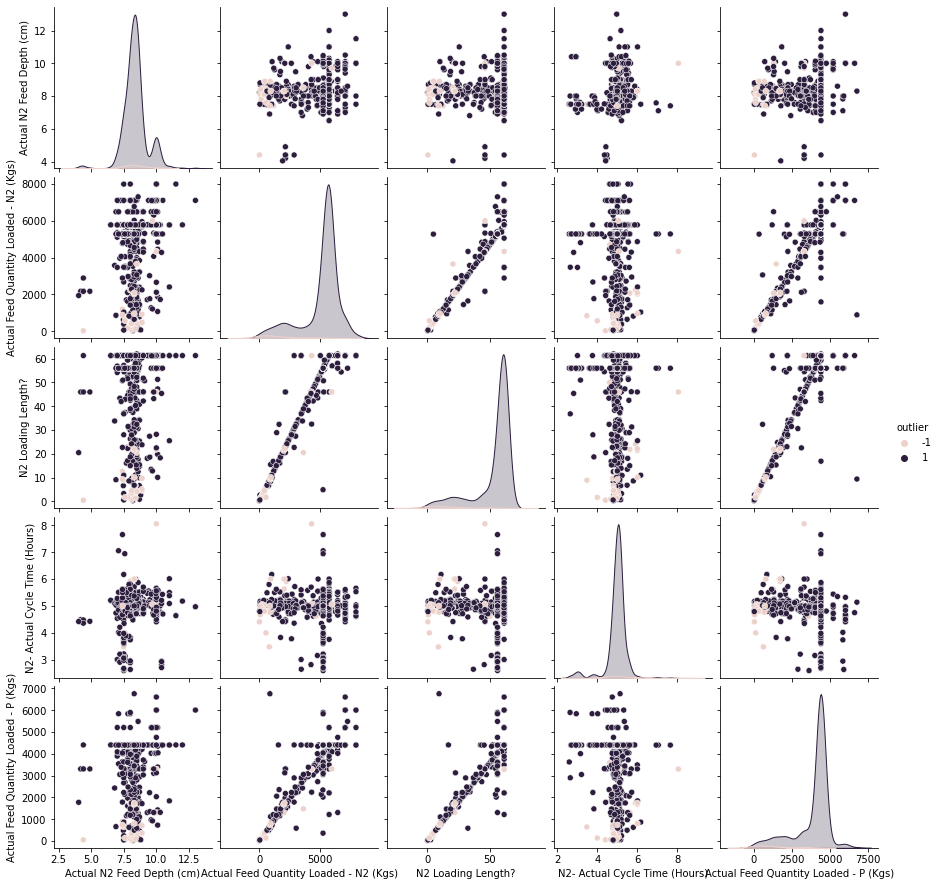

In [78]:
#- Actual N2 Feed Depth (cm)
#- Actual Feed Quantity Loaded - N2 (Kgs)
#- N2 Loading Length?
##- N2- Actual Cycle Time (Hours)
#- Actual Feed Quantity Loaded - P (Kgs)
#- P Loaded Length (m)
#- P Actual Feed Depth (cm)
#- P - Actual Cycle Time Hours
#- Quantity of WL harvested at 85% purity (Kgs)
#- Actual N2 Feeding rate (mg/YL-Day)
#- N2-P Cycle
#- Total feed used (Kgs)
sns.pairplot(data = df10, vars=['Actual N2 Feed Depth (cm)','Actual Feed Quantity Loaded - N2 (Kgs)','N2 Loading Length?','N2- Actual Cycle Time (Hours)',
                               'Actual Feed Quantity Loaded - P (Kgs)'], hue='outlier')
plt.show()

### Flooring and Capping (winorization)

In [79]:
df11=df10.copy()

In [80]:
upper_limit = df11['Actual N2 Feed Depth (cm)'].quantile(0.885)
lower_limit = df11['Actual N2 Feed Depth (cm)'].quantile(0.1)

In [81]:
print(upper_limit)
print(lower_limit)

9.5
7.5


In [82]:
df11['Actual N2 Feed Depth (cm)'] = np.where(df11['Actual N2 Feed Depth (cm)'] >= upper_limit,
        upper_limit,
        np.where(df11['Actual N2 Feed Depth (cm)'] <= lower_limit,
        lower_limit,
        df11['Actual N2 Feed Depth (cm)']))

<AxesSubplot:xlabel='Actual N2 Feed Depth (cm)'>

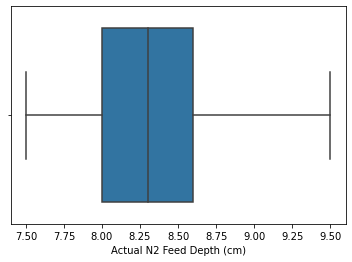

In [83]:
sns.boxplot(df11['Actual N2 Feed Depth (cm)'])

In [84]:
df6.describe().T

,count,mean,std,min,25%,50%,75%,max
N2 Spec Feeding Rate (mg/l/d),762.0,6.647375e+01,4.506380e+00,65.000,6.500000e+01,6.500000e+01,6.500000e+01,9.000000e+01
P Spec Feeding Rate (mg/l/d),762.0,1.111811e+02,5.631828e+00,110.000,1.100000e+02,1.100000e+02,1.100000e+02,1.500000e+02
N2 Spec Loading Density (mg/l/d),762.0,2.000000e+05,0.000000e+00,200000.000,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05
P Spec Loading Density (mg/l/d),762.0,2.000000e+05,0.000000e+00,200000.000,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05
Actual YL Quantity Loaded (#),763.0,1.500835e+07,4.861191e+06,82179.000,1.533269e+07,1.778500e+07,1.778500e+07,1.778500e+07
Avg. YL Mass (mg),756.0,2.395185e+00,1.416398e-01,1.980,2.320000e+00,2.360000e+00,2.430000e+00,3.430000e+00
Total YL Mass Loaded (Kg),756.0,3.603052e+01,1.146367e+01,0.190,3.718750e+01,4.109000e+01,4.197000e+01,4.998000e+01
Actual N2 Feed Depth (cm),761.0,8.367135e+00,8.904002e-01,4.040,8.000000e+00,8.300000e+00,8.600000e+00,1.300000e+01
Actual Feed Quantity Loaded - N2 (Kgs),762.0,5.015907e+03,1.709648e+03,21.000,5.022000e+03,5.781000e+03,5.781000e+03,8.003000e+03
N2 Loading Length?,763.0,5.165596e+01,1.673158e+01,0.300,5.200000e+01,6.130000e+01,6.130000e+01,6.200000e+01


In [85]:
upper_limit = df11['Actual Feed Quantity Loaded - N2 (Kgs)'].quantile(0.95)
lower_limit = df11['Actual Feed Quantity Loaded - N2 (Kgs)'].quantile(0.05)
print(upper_limit)
print(lower_limit)

7113.25
946.75


In [86]:
df11['Actual Feed Quantity Loaded - N2 (Kgs)'] = np.where(df11['Actual Feed Quantity Loaded - N2 (Kgs)'] >= upper_limit,
        upper_limit,
        np.where(df11['Actual Feed Quantity Loaded - N2 (Kgs)'] <= lower_limit,
        lower_limit,
        df11['Actual Feed Quantity Loaded - N2 (Kgs)']))

<AxesSubplot:xlabel='Actual Feed Quantity Loaded - N2 (Kgs)'>

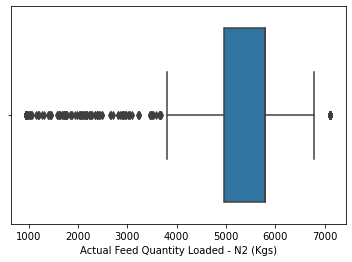

In [87]:
sns.boxplot(df11['Actual Feed Quantity Loaded - N2 (Kgs)'])

In [88]:
df11=df10.copy()

In [89]:
upper_limit = df11['N2 Loading Length?'].quantile(0.95)
lower_limit = df11['N2 Loading Length?'].quantile(0.05)
print(upper_limit)
print(lower_limit)

61.3
9.75


In [90]:
df11['N2 Loading Length?'] = np.where(df11['N2 Loading Length?'] >= upper_limit,
        upper_limit,
        np.where(df11['N2 Loading Length?'] <= lower_limit,
        lower_limit,
        df11['N2 Loading Length?']))

<AxesSubplot:xlabel='N2 Loading Length?'>

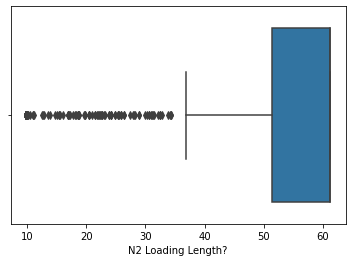

In [91]:
sns.boxplot(df11['N2 Loading Length?'])

In [92]:
upper_limit = df11['N2- Actual Cycle Time (Hours)'].quantile(0.99)
lower_limit = df11['N2- Actual Cycle Time (Hours)'].quantile(0.01)
print(upper_limit)
print(lower_limit)

6.0
2.923


In [93]:
df11['N2- Actual Cycle Time (Hours)'] = np.where(df11['N2- Actual Cycle Time (Hours)'] >= upper_limit,
        upper_limit,
        np.where(df11['N2- Actual Cycle Time (Hours)'] <= lower_limit,
        lower_limit,
        df11['N2- Actual Cycle Time (Hours)']))

In [94]:
upper_limit = df11['Actual Feed Quantity Loaded - P (Kgs)'].quantile(0.90)
lower_limit = df11['Actual Feed Quantity Loaded - P (Kgs)'].quantile(0.1)
print(upper_limit)
print(lower_limit)

4402.0
1486.5


In [95]:
df11['Actual Feed Quantity Loaded - P (Kgs)'] = np.where(df11['Actual Feed Quantity Loaded - P (Kgs)'] >= upper_limit,
        upper_limit,
        np.where(df11['Actual Feed Quantity Loaded - P (Kgs)'] <= lower_limit,
        lower_limit,
        df11['Actual Feed Quantity Loaded - P (Kgs)']))

In [96]:
upper_limit = df11['P Loaded Length (m)'].quantile(0.95)
lower_limit = df11['P Loaded Length (m)'].quantile(0.05)
print(upper_limit)
print(lower_limit)

46.0
7.325


In [97]:
df11['P Loaded Length (m)'] = np.where(df11['P Loaded Length (m)'] >= upper_limit,
        upper_limit,
        np.where(df11['P Loaded Length (m)'] <= lower_limit,
        lower_limit,
        df11['P Loaded Length (m)']))

In [98]:
upper_limit = df11['P Actual Feed Depth (cm)'].quantile(0.99)
lower_limit = df11['P Actual Feed Depth (cm)'].quantile(0.01)
print(upper_limit)
print(lower_limit)

10.2475
6.3


In [99]:
df11['P Actual Feed Depth (cm)'] = np.where(df11['P Actual Feed Depth (cm)'] >= upper_limit,
        upper_limit,
        np.where(df11['P Actual Feed Depth (cm)'] <= lower_limit,
        lower_limit,
        df11['P Actual Feed Depth (cm)']))

In [100]:
upper_limit = df11['P - Actual Cycle Time Hours'].quantile(0.99)
lower_limit = df11['P - Actual Cycle Time Hours'].quantile(0.01)
print(upper_limit)
print(lower_limit)

5.935000000000002
2.4595000000000002


In [101]:
df11['P - Actual Cycle Time Hours'] = np.where(df11['P - Actual Cycle Time Hours'] >= upper_limit,
        upper_limit,
        np.where(df11['P - Actual Cycle Time Hours'] <= lower_limit,
        lower_limit,
        df11['P - Actual Cycle Time Hours']))

In [102]:
upper_limit = df11['Quantity of WL harvested at 85% purity (Kgs)'].quantile(0.90)
lower_limit = df11['Quantity of WL harvested at 85% purity (Kgs)'].quantile(0.1)
print(upper_limit)
print(lower_limit)

976.5
266.5


In [103]:
df11['Quantity of WL harvested at 85% purity (Kgs)'] = np.where(df11['Quantity of WL harvested at 85% purity (Kgs)'] >= upper_limit,
        upper_limit,
        np.where(df11['Quantity of WL harvested at 85% purity (Kgs)'] <= lower_limit,
        lower_limit,
        df11['Quantity of WL harvested at 85% purity (Kgs)']))

In [104]:
upper_limit = df11['Actual  N2 Feeding rate (mg/YL-Day)'].quantile(0.99)
lower_limit = df11['Actual  N2 Feeding rate (mg/YL-Day)'].quantile(0.01)
print(upper_limit)
print(lower_limit)

120.65000000000002
36.364999999999995


In [105]:
df11['Actual  N2 Feeding rate (mg/YL-Day)'] = np.where(df11['Actual  N2 Feeding rate (mg/YL-Day)'] >= upper_limit,
        upper_limit,
        np.where(df11['Actual  N2 Feeding rate (mg/YL-Day)'] <= lower_limit,
        lower_limit,
        df11['Actual  N2 Feeding rate (mg/YL-Day)']))

In [106]:
upper_limit = df11['N2-P Cycle'].quantile(0.99)
lower_limit = df11['N2-P Cycle'].quantile(0.01)
print(upper_limit)
print(lower_limit)

11.412300000000002
6.0112499999999995


In [107]:
df11['N2-P Cycle'] = np.where(df11['N2-P Cycle'] >= upper_limit,
        upper_limit,
        np.where(df11['N2-P Cycle'] <= lower_limit,
        lower_limit,
        df11['N2-P Cycle']))

In [108]:
upper_limit = df11['Total feed used (Kgs) '].quantile(0.95)
lower_limit = df11['Total feed used (Kgs) '].quantile(0.05)
print(upper_limit)
print(lower_limit)

11514.0
1763.75


In [109]:
df11['Total feed used (Kgs) '] = np.where(df11['Total feed used (Kgs) '] >= upper_limit,
        upper_limit,
        np.where(df11['Total feed used (Kgs) '] <= lower_limit,
        lower_limit,
        df11['Total feed used (Kgs) ']))

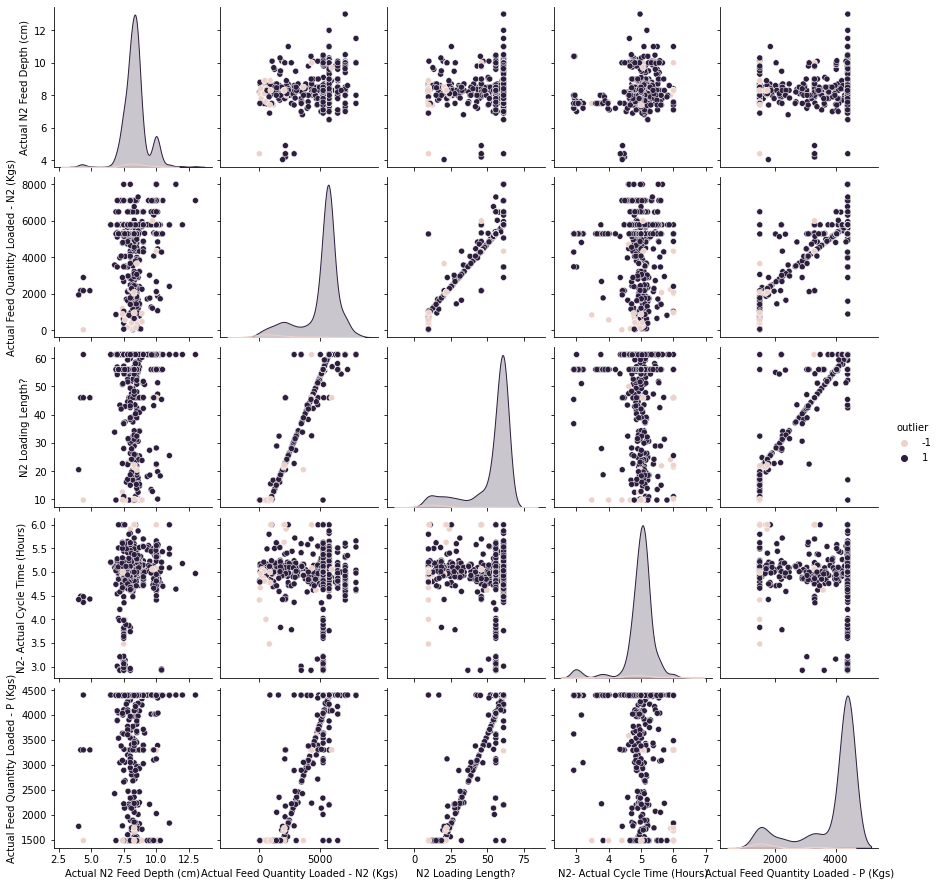

In [110]:
sns.pairplot(data = df11, vars=['Actual N2 Feed Depth (cm)','Actual Feed Quantity Loaded - N2 (Kgs)','N2 Loading Length?','N2- Actual Cycle Time (Hours)',
                               'Actual Feed Quantity Loaded - P (Kgs)'], hue='outlier')
plt.show()

### Feature Selection 

In [111]:
df12=df11.copy()

In [112]:
df12.rename(columns = {'Quantity of WL harvested at 85% purity (Kgs)':'Quantity_harvested'}, inplace = True)

In [113]:
# To have a non biased measure for the quanity_harvested we create a new column
df12['Total YL Mass Loaded (Kg)_per_m']=df12['Total YL Mass Loaded (Kg)']/df12['P Loaded Length (m)']

In [114]:
df12['Quantity_harvested_per_m']=df12['Quantity_harvested']/df12['P Loaded Length (m)']

In [115]:
df12.head()

,N2 Spec Feeding Rate (mg/l/d),P Spec Feeding Rate (mg/l/d),N2 Spec Loading Density (mg/l/d),P Spec Loading Density (mg/l/d),Actual YL Quantity Loaded (#),Avg. YL Mass (mg),Total YL Mass Loaded (Kg),Actual N2 Feed Depth (cm),Actual Feed Quantity Loaded - N2 (Kgs),N2 Loading Length?,YL Loaded GIGO Score (%),N2 Bed Loading GIGO Score (%),10m Section N2 Bed Loading GIGO Score (%),N2 YL Harvest GIGO Score (%),N2- Actual Cycle Time (Hours),Mass of N2 Sample (g),Mass of pure N2 from Sample (g),Average Number of N2 in 1 g,Average Mass of N2 Larvae in Sample (mg),Actual Feed Quantity Loaded - P (Kgs),P Loaded Length (m),P Actual Feed Depth (cm),P YL GIGO Score (%),P Bed Loading GIGO Score (%),WL Harvest GIGO Score (%),P - Actual Cycle Time Hours,Quantity_harvested,Average Mass of harvested WL (mg),Actual N2 Feeding rate (mg/YL-Day),N2-P Cycle,Total feed used (Kgs),N2 Formulation_Coke,N2 Formulation_F011,N2 Formulation_F077,N2 Formulation_Fanta,N2 Formulation_Fruit loops,N2 Formulation_Jelly tots,N2 Formulation_Miranda,N2 Formulation_Rossy,N2 Formulation_Sour worms,N2 Formulation_Sprite,N2 Formulation_Steri Stumpi,P Formulation_Alvaro,P Formulation_Batman,P Formulation_F005,P Formulation_F011,P Formulation_F076,P Formulation_Marigold,P Formulation_Powerade,P Formulation_Rockstar,P Formulation_Shortcake,P Formulation_Star trek,P Formulation_Steri Stumpi,P Formulation_Stoney,P Formulation_Sungold,P Formulation_Super M,P Formulation_Waridi,P Formulation_Yogi Sip,How N2 is being loaded?_Mechanical,N2 Transition Type _Harvest Separation and Refill,How P is being loaded?_Mechanical,N2 Purity Score (% Pure YL) Spec >=70%_Y,outlier,Total YL Mass Loaded (Kg)_per_m,Quantity_harvested_per_m
0,65.0,110.0,200000.0,200000.0,17785000.0,2.36,41.97,8.6,5781.0,61.3,75.0,100.0,100.0,75.0,5.040,731.86,502.980,18.00,55.50,4402.0,46.0,8.00,67.0,96.4,95.0,2.942,787.4,80.820,64.5,8.3614,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0.912391,17.117391
1,65.0,110.0,200000.0,200000.0,17785000.0,2.31,41.08,8.6,5781.0,61.3,75.0,100.0,100.0,100.0,5.180,870.62,680.672,17.30,59.56,4402.0,46.0,7.70,67.0,98.2,100.0,2.840,920.0,86.638,62.8,8.1276,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1,0.893043,20.000000
2,65.0,110.0,200000.0,200000.0,17785000.0,2.33,41.44,8.4,5781.0,61.3,75.0,100.0,100.0,100.0,5.152,854.20,667.048,16.84,60.38,4402.0,46.0,7.48,67.0,98.2,100.0,2.850,780.4,85.278,63.1,8.1422,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1,0.900870,16.965217
3,65.0,110.0,200000.0,200000.0,4858044.0,2.37,11.51,8.0,1579.0,16.8,75.0,100.0,100.0,75.0,5.210,658.13,455.970,16.80,59.50,1486.5,12.6,7.60,67.0,82.0,100.0,2.966,493.2,77.964,62.4,8.0844,2781.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0.913492,39.142857
4,65.0,110.0,200000.0,200000.0,17785000.0,2.35,41.79,8.0,5781.0,61.3,75.0,100.0,100.0,75.0,5.120,735.68,502.810,15.90,62.90,4402.0,46.0,7.70,67.0,82.0,95.0,2.942,787.4,80.820,63.4,8.3614,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0.908478,17.117391


Checking Feature Importance based On correlation


In [116]:
importances = df12.drop('Quantity_harvested_per_m', axis=1).apply(lambda x: x.corr(df12.Quantity_harvested_per_m))
indices=np.argsort(importances)
print(importances[indices])

Actual YL Quantity Loaded (#)                       -0.624901
Average Mass of N2 Larvae in Sample  (mg)            0.187716
Total YL Mass Loaded (Kg)_per_m                     -0.297719
Total YL Mass Loaded (Kg)_per_m                     -0.297719
N2 Spec Loading Density (mg/l/d)                          NaN
                                                       ...   
Mass of pure N2 from Sample (g)                      0.138772
P Formulation_Stoney                                -0.056467
N2 Transition Type _Harvest Separation and Refill    0.060779
N2 Bed Loading GIGO Score (%)                        0.184039
N2-P Cycle                                          -0.082721
Length: 64, dtype: float64


### The Combined Approach

In [117]:
df13=df12.copy()

In [118]:
df13.head()

,N2 Spec Feeding Rate (mg/l/d),P Spec Feeding Rate (mg/l/d),N2 Spec Loading Density (mg/l/d),P Spec Loading Density (mg/l/d),Actual YL Quantity Loaded (#),Avg. YL Mass (mg),Total YL Mass Loaded (Kg),Actual N2 Feed Depth (cm),Actual Feed Quantity Loaded - N2 (Kgs),N2 Loading Length?,YL Loaded GIGO Score (%),N2 Bed Loading GIGO Score (%),10m Section N2 Bed Loading GIGO Score (%),N2 YL Harvest GIGO Score (%),N2- Actual Cycle Time (Hours),Mass of N2 Sample (g),Mass of pure N2 from Sample (g),Average Number of N2 in 1 g,Average Mass of N2 Larvae in Sample (mg),Actual Feed Quantity Loaded - P (Kgs),P Loaded Length (m),P Actual Feed Depth (cm),P YL GIGO Score (%),P Bed Loading GIGO Score (%),WL Harvest GIGO Score (%),P - Actual Cycle Time Hours,Quantity_harvested,Average Mass of harvested WL (mg),Actual N2 Feeding rate (mg/YL-Day),N2-P Cycle,Total feed used (Kgs),N2 Formulation_Coke,N2 Formulation_F011,N2 Formulation_F077,N2 Formulation_Fanta,N2 Formulation_Fruit loops,N2 Formulation_Jelly tots,N2 Formulation_Miranda,N2 Formulation_Rossy,N2 Formulation_Sour worms,N2 Formulation_Sprite,N2 Formulation_Steri Stumpi,P Formulation_Alvaro,P Formulation_Batman,P Formulation_F005,P Formulation_F011,P Formulation_F076,P Formulation_Marigold,P Formulation_Powerade,P Formulation_Rockstar,P Formulation_Shortcake,P Formulation_Star trek,P Formulation_Steri Stumpi,P Formulation_Stoney,P Formulation_Sungold,P Formulation_Super M,P Formulation_Waridi,P Formulation_Yogi Sip,How N2 is being loaded?_Mechanical,N2 Transition Type _Harvest Separation and Refill,How P is being loaded?_Mechanical,N2 Purity Score (% Pure YL) Spec >=70%_Y,outlier,Total YL Mass Loaded (Kg)_per_m,Quantity_harvested_per_m
0,65.0,110.0,200000.0,200000.0,17785000.0,2.36,41.97,8.6,5781.0,61.3,75.0,100.0,100.0,75.0,5.040,731.86,502.980,18.00,55.50,4402.0,46.0,8.00,67.0,96.4,95.0,2.942,787.4,80.820,64.5,8.3614,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0.912391,17.117391
1,65.0,110.0,200000.0,200000.0,17785000.0,2.31,41.08,8.6,5781.0,61.3,75.0,100.0,100.0,100.0,5.180,870.62,680.672,17.30,59.56,4402.0,46.0,7.70,67.0,98.2,100.0,2.840,920.0,86.638,62.8,8.1276,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1,0.893043,20.000000
2,65.0,110.0,200000.0,200000.0,17785000.0,2.33,41.44,8.4,5781.0,61.3,75.0,100.0,100.0,100.0,5.152,854.20,667.048,16.84,60.38,4402.0,46.0,7.48,67.0,98.2,100.0,2.850,780.4,85.278,63.1,8.1422,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1,0.900870,16.965217
3,65.0,110.0,200000.0,200000.0,4858044.0,2.37,11.51,8.0,1579.0,16.8,75.0,100.0,100.0,75.0,5.210,658.13,455.970,16.80,59.50,1486.5,12.6,7.60,67.0,82.0,100.0,2.966,493.2,77.964,62.4,8.0844,2781.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0.913492,39.142857
4,65.0,110.0,200000.0,200000.0,17785000.0,2.35,41.79,8.0,5781.0,61.3,75.0,100.0,100.0,75.0,5.120,735.68,502.810,15.90,62.90,4402.0,46.0,7.70,67.0,82.0,95.0,2.942,787.4,80.820,63.4,8.3614,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0.908478,17.117391


In [119]:
df13.columns

Index(['N2 Spec Feeding Rate (mg/l/d)', 'P Spec Feeding Rate (mg/l/d)',
       'N2 Spec Loading Density (mg/l/d)', 'P Spec Loading Density (mg/l/d)',
       'Actual YL Quantity Loaded (#)', 'Avg. YL Mass (mg)',
       'Total YL Mass Loaded (Kg)', 'Actual N2 Feed Depth (cm)',
       'Actual Feed Quantity Loaded - N2 (Kgs)', 'N2 Loading Length?',
       'YL Loaded  GIGO Score (%)', 'N2 Bed Loading GIGO Score (%)',
       '10m Section N2 Bed Loading GIGO Score (%)',
       'N2 YL Harvest GIGO Score (%)', 'N2- Actual Cycle Time (Hours)',
       'Mass of N2 Sample (g)', 'Mass of pure N2 from Sample (g)',
       'Average Number of N2 in 1 g',
       'Average Mass of N2 Larvae in Sample  (mg)',
       'Actual Feed Quantity Loaded - P (Kgs)', 'P Loaded Length (m)',
       'P Actual Feed Depth (cm)', 'P YL GIGO Score (%)',
       'P Bed Loading GIGO Score (%)', 'WL Harvest GIGO Score (%)',
       'P - Actual Cycle Time Hours', 'Quantity_harvested',
       'Average Mass of harvested WL (mg)',
  

In [120]:
X = df13.drop(['Quantity_harvested','Quantity_harvested_per_m'], axis=1)
y= df13['Quantity_harvested_per_m'].rename('target')

In [121]:
#pip install xgboost

In [122]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import chi2, SelectKBest,f_regression, mutual_info_regression, RFECV, RFE, SelectFromModel
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [123]:
##Split dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape

(536, 63)

### Filter Methodes (Correlation and Mutual information)

In [124]:
# Ussing correlation method
# no of maximum features we need to select
num_feats=50


col=['target']
y2 = pd.DataFrame(y_train, columns=col)


feature_name = list(X_train.columns)



def cor_selector(X_train, y2,num_feats):
    cor_list = []
    feature_name = X_train.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X_train.columns.tolist():
        cor = np.corrcoef(X_train[i], y2.target)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X_train.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X_train, y2,num_feats)

print(str(len(cor_feature)), 'selected features')

50 selected features


In [125]:
#normalizer = Normalizer().fit(X)

In [126]:
mi_selector = SelectKBest(mutual_info_regression, k=num_feats)
mi_selector.fit(X_train, y_train)
mi_support = mi_selector.get_support()
mi_feature = X_train.loc[:,mi_support].columns.tolist()
print(str(len(mi_feature)), 'selected features')

50 selected features


#### Wrapper Methods

In [127]:
##Logit Estimator 

rfe_selector = RFE(estimator=LinearRegression(),n_features_to_select=num_feats)
rfe_selector.fit(X_train, y_train)


rfe_linear_support = rfe_selector.get_support()
rfe_linear_feature = X_train.loc[:,rfe_linear_support].columns.tolist()
print(str(len(rfe_linear_feature)), 'selected features')

50 selected features


In [128]:
## Estimator on xgboost

rfe_selector = RFE(estimator=XGBRegressor(eval_metric='logloss', n_estimators=10), n_features_to_select=num_feats, step=10, verbose=0)
rfe_selector.fit(X_train, y_train)

rfe_xgb_support = rfe_selector.get_support()
rfe_xgb_feature = X_train.loc[:,rfe_xgb_support].columns.tolist()
print(str(len(rfe_xgb_feature)), 'selected features')

50 selected features


### Embeded methods 

In [129]:
##logistic

embeded_lr_selector = SelectFromModel(LinearRegression(), max_features=num_feats)
embeded_lr_selector.fit(X_train, y_train)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X_train.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

24 selected features


In [130]:
## Random Forest
embeded_rf_selector = SelectFromModel(RandomForestRegressor(n_estimators=10), max_features=num_feats)
embeded_rf_selector.fit(X_train, y_train)
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

8 selected features


In [131]:
#pip install lightgbm

In [132]:
from lightgbm import LGBMRegressor

lgbc=LGBMRegressor(n_estimators=10, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X_train, y_train)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X_train.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

18 selected features


### Comining the methods

In [133]:
pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name,
                                     'Pearson':cor_support,
                            
                                     'Mi':mi_support,
                                     'RFE Logit': rfe_linear_support,
                                     'RFE XGB': rfe_xgb_support,                                                                      
                                     'Embeded Logistic':embeded_lr_support,
                                     'Embeded Random Forest':embeded_rf_support, 
                                     'Embeded LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top features
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(5)


,Feature,Pearson,Mi,RFE Logit,RFE XGB,Embeded Logistic,Embeded Random Forest,Embeded LightGBM,Total
1,Total YL Mass Loaded (Kg)_per_m,True,True,True,True,False,True,True,6
2,Total YL Mass Loaded (Kg),True,True,True,True,False,True,True,6
3,P Formulation_Super M,True,True,True,True,True,False,True,6
4,N2- Actual Cycle Time (Hours),True,True,True,True,False,True,True,6
5,N2 Formulation_Sour worms,True,True,True,True,True,False,True,6


In [134]:
df13.drop(['Total YL Mass Loaded (Kg)', 'Average Mass of harvested WL (mg)'], axis =1, inplace=True)

In [135]:
#feature_selection_df.to_csv('selected_features1.csv', index=False)

In [136]:
X = df13[['N2- Actual Cycle Time (Hours)','N2 Formulation_Coke','P Formulation_Super M','N2 Loading Length?','Total YL Mass Loaded (Kg)_per_m','P Loaded Length (m)','P Formulation_Batman','P - Actual Cycle Time Hours','N2 Purity Score (% Pure YL) Spec >=70%_Y','N2 Formulation_Sour worms','Average Number of N2 in 1 g','Actual N2 Feed Depth (cm)','Actual  N2 Feeding rate (mg/YL-Day)']]

In [137]:
#X = df13[['P Loaded Length (m)','P Formulation_Super M','N2-P Cycle','N2 Formulation_Sour worms','N2 Formulation_Coke','Total YL Mass Loaded (Kg)','P Formulation_Sungold','P Formulation_F005','P Actual Feed Depth (cm)','P - Actual Cycle Time Hours','N2- Actual Cycle Time (Hours)']]
         
# 'N2 YL Harvest GIGO Score (%)','N2 Transition Type _Harvest Separation and Refill','N2 Purity Score (% Pure YL) Spec >=70%_Y','N2 Loading Length?','N2 Formulation_Fanta','N2 Formulation_F077','How P is being loaded?_Mechanical','Actual N2 Feed Depth (cm)','Actual  N2 Feeding rate (mg/YL-Day)']]

In [138]:
X.shape

(766, 13)

In [139]:
X.head()

,N2- Actual Cycle Time (Hours),N2 Formulation_Coke,P Formulation_Super M,N2 Loading Length?,Total YL Mass Loaded (Kg)_per_m,P Loaded Length (m),P Formulation_Batman,P - Actual Cycle Time Hours,N2 Purity Score (% Pure YL) Spec >=70%_Y,N2 Formulation_Sour worms,Average Number of N2 in 1 g,Actual N2 Feed Depth (cm),Actual N2 Feeding rate (mg/YL-Day)
0,5.040,1.0,1.0,61.3,0.912391,46.0,0.0,2.942,0.0,0.0,18.00,8.6,64.5
1,5.180,1.0,0.0,61.3,0.893043,46.0,0.0,2.840,1.0,0.0,17.30,8.6,62.8
2,5.152,1.0,0.0,61.3,0.900870,46.0,0.0,2.850,1.0,0.0,16.84,8.4,63.1
3,5.210,1.0,1.0,16.8,0.913492,12.6,0.0,2.966,0.0,0.0,16.80,8.0,62.4
4,5.120,1.0,1.0,61.3,0.908478,46.0,0.0,2.942,0.0,0.0,15.90,8.0,63.4


In [140]:
#X.drop(columns=['index'], inplace = True)

In [141]:
X.shape

(766, 13)

In [142]:
#X.to_csv('featured selected.csv')

In [143]:
df12.head()

,N2 Spec Feeding Rate (mg/l/d),P Spec Feeding Rate (mg/l/d),N2 Spec Loading Density (mg/l/d),P Spec Loading Density (mg/l/d),Actual YL Quantity Loaded (#),Avg. YL Mass (mg),Total YL Mass Loaded (Kg),Actual N2 Feed Depth (cm),Actual Feed Quantity Loaded - N2 (Kgs),N2 Loading Length?,YL Loaded GIGO Score (%),N2 Bed Loading GIGO Score (%),10m Section N2 Bed Loading GIGO Score (%),N2 YL Harvest GIGO Score (%),N2- Actual Cycle Time (Hours),Mass of N2 Sample (g),Mass of pure N2 from Sample (g),Average Number of N2 in 1 g,Average Mass of N2 Larvae in Sample (mg),Actual Feed Quantity Loaded - P (Kgs),P Loaded Length (m),P Actual Feed Depth (cm),P YL GIGO Score (%),P Bed Loading GIGO Score (%),WL Harvest GIGO Score (%),P - Actual Cycle Time Hours,Quantity_harvested,Average Mass of harvested WL (mg),Actual N2 Feeding rate (mg/YL-Day),N2-P Cycle,Total feed used (Kgs),N2 Formulation_Coke,N2 Formulation_F011,N2 Formulation_F077,N2 Formulation_Fanta,N2 Formulation_Fruit loops,N2 Formulation_Jelly tots,N2 Formulation_Miranda,N2 Formulation_Rossy,N2 Formulation_Sour worms,N2 Formulation_Sprite,N2 Formulation_Steri Stumpi,P Formulation_Alvaro,P Formulation_Batman,P Formulation_F005,P Formulation_F011,P Formulation_F076,P Formulation_Marigold,P Formulation_Powerade,P Formulation_Rockstar,P Formulation_Shortcake,P Formulation_Star trek,P Formulation_Steri Stumpi,P Formulation_Stoney,P Formulation_Sungold,P Formulation_Super M,P Formulation_Waridi,P Formulation_Yogi Sip,How N2 is being loaded?_Mechanical,N2 Transition Type _Harvest Separation and Refill,How P is being loaded?_Mechanical,N2 Purity Score (% Pure YL) Spec >=70%_Y,outlier,Total YL Mass Loaded (Kg)_per_m,Quantity_harvested_per_m
0,65.0,110.0,200000.0,200000.0,17785000.0,2.36,41.97,8.6,5781.0,61.3,75.0,100.0,100.0,75.0,5.040,731.86,502.980,18.00,55.50,4402.0,46.0,8.00,67.0,96.4,95.0,2.942,787.4,80.820,64.5,8.3614,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0.912391,17.117391
1,65.0,110.0,200000.0,200000.0,17785000.0,2.31,41.08,8.6,5781.0,61.3,75.0,100.0,100.0,100.0,5.180,870.62,680.672,17.30,59.56,4402.0,46.0,7.70,67.0,98.2,100.0,2.840,920.0,86.638,62.8,8.1276,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1,0.893043,20.000000
2,65.0,110.0,200000.0,200000.0,17785000.0,2.33,41.44,8.4,5781.0,61.3,75.0,100.0,100.0,100.0,5.152,854.20,667.048,16.84,60.38,4402.0,46.0,7.48,67.0,98.2,100.0,2.850,780.4,85.278,63.1,8.1422,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1,0.900870,16.965217
3,65.0,110.0,200000.0,200000.0,4858044.0,2.37,11.51,8.0,1579.0,16.8,75.0,100.0,100.0,75.0,5.210,658.13,455.970,16.80,59.50,1486.5,12.6,7.60,67.0,82.0,100.0,2.966,493.2,77.964,62.4,8.0844,2781.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0.913492,39.142857
4,65.0,110.0,200000.0,200000.0,17785000.0,2.35,41.79,8.0,5781.0,61.3,75.0,100.0,100.0,75.0,5.120,735.68,502.810,15.90,62.90,4402.0,46.0,7.70,67.0,82.0,95.0,2.942,787.4,80.820,63.4,8.3614,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0.908478,17.117391


In [144]:
X.columns

Index(['N2- Actual Cycle Time (Hours)', 'N2 Formulation_Coke',
       'P Formulation_Super M', 'N2 Loading Length?',
       'Total YL Mass Loaded (Kg)_per_m', 'P Loaded Length (m)',
       'P Formulation_Batman', 'P - Actual Cycle Time Hours',
       'N2 Purity Score (% Pure YL) Spec >=70%_Y', 'N2 Formulation_Sour worms',
       'Average Number of N2 in 1 g', 'Actual N2 Feed Depth (cm)',
       'Actual  N2 Feeding rate (mg/YL-Day)'],
      dtype='object')

## Further Exploration

In [145]:
dfx.head()

,Actual Harvest Date
30,2022-09-07
31,2022-09-07
32,2022-09-07
33,2022-09-07
34,2022-09-07


In [146]:
dfy=dfx.copy()

In [147]:
dfy= dfy.reset_index()
dfy

,index,Actual Harvest Date
0,30,2022-09-07
1,31,2022-09-07
2,32,2022-09-07
3,33,2022-09-07
4,34,2022-09-07
5,35,2022-09-07
6,36,2022-09-07
7,37,2022-09-07
8,38,2022-09-07
9,39,2022-09-07


In [148]:
#dfy.drop('index', axis=1, inplace=True)

In [149]:
dfy

,index,Actual Harvest Date
0,30,2022-09-07
1,31,2022-09-07
2,32,2022-09-07
3,33,2022-09-07
4,34,2022-09-07
5,35,2022-09-07
6,36,2022-09-07
7,37,2022-09-07
8,38,2022-09-07
9,39,2022-09-07


In [150]:
X.head()

,N2- Actual Cycle Time (Hours),N2 Formulation_Coke,P Formulation_Super M,N2 Loading Length?,Total YL Mass Loaded (Kg)_per_m,P Loaded Length (m),P Formulation_Batman,P - Actual Cycle Time Hours,N2 Purity Score (% Pure YL) Spec >=70%_Y,N2 Formulation_Sour worms,Average Number of N2 in 1 g,Actual N2 Feed Depth (cm),Actual N2 Feeding rate (mg/YL-Day)
0,5.040,1.0,1.0,61.3,0.912391,46.0,0.0,2.942,0.0,0.0,18.00,8.6,64.5
1,5.180,1.0,0.0,61.3,0.893043,46.0,0.0,2.840,1.0,0.0,17.30,8.6,62.8
2,5.152,1.0,0.0,61.3,0.900870,46.0,0.0,2.850,1.0,0.0,16.84,8.4,63.1
3,5.210,1.0,1.0,16.8,0.913492,12.6,0.0,2.966,0.0,0.0,16.80,8.0,62.4
4,5.120,1.0,1.0,61.3,0.908478,46.0,0.0,2.942,0.0,0.0,15.90,8.0,63.4


In [151]:
df13.columns

Index(['N2 Spec Feeding Rate (mg/l/d)', 'P Spec Feeding Rate (mg/l/d)',
       'N2 Spec Loading Density (mg/l/d)', 'P Spec Loading Density (mg/l/d)',
       'Actual YL Quantity Loaded (#)', 'Avg. YL Mass (mg)',
       'Actual N2 Feed Depth (cm)', 'Actual Feed Quantity Loaded - N2 (Kgs)',
       'N2 Loading Length?', 'YL Loaded  GIGO Score (%)',
       'N2 Bed Loading GIGO Score (%)',
       '10m Section N2 Bed Loading GIGO Score (%)',
       'N2 YL Harvest GIGO Score (%)', 'N2- Actual Cycle Time (Hours)',
       'Mass of N2 Sample (g)', 'Mass of pure N2 from Sample (g)',
       'Average Number of N2 in 1 g',
       'Average Mass of N2 Larvae in Sample  (mg)',
       'Actual Feed Quantity Loaded - P (Kgs)', 'P Loaded Length (m)',
       'P Actual Feed Depth (cm)', 'P YL GIGO Score (%)',
       'P Bed Loading GIGO Score (%)', 'WL Harvest GIGO Score (%)',
       'P - Actual Cycle Time Hours', 'Quantity_harvested',
       'Actual  N2 Feeding rate (mg/YL-Day)', 'N2-P Cycle',
       'Total f

In [152]:
df13.head()

,N2 Spec Feeding Rate (mg/l/d),P Spec Feeding Rate (mg/l/d),N2 Spec Loading Density (mg/l/d),P Spec Loading Density (mg/l/d),Actual YL Quantity Loaded (#),Avg. YL Mass (mg),Actual N2 Feed Depth (cm),Actual Feed Quantity Loaded - N2 (Kgs),N2 Loading Length?,YL Loaded GIGO Score (%),N2 Bed Loading GIGO Score (%),10m Section N2 Bed Loading GIGO Score (%),N2 YL Harvest GIGO Score (%),N2- Actual Cycle Time (Hours),Mass of N2 Sample (g),Mass of pure N2 from Sample (g),Average Number of N2 in 1 g,Average Mass of N2 Larvae in Sample (mg),Actual Feed Quantity Loaded - P (Kgs),P Loaded Length (m),P Actual Feed Depth (cm),P YL GIGO Score (%),P Bed Loading GIGO Score (%),WL Harvest GIGO Score (%),P - Actual Cycle Time Hours,Quantity_harvested,Actual N2 Feeding rate (mg/YL-Day),N2-P Cycle,Total feed used (Kgs),N2 Formulation_Coke,N2 Formulation_F011,N2 Formulation_F077,N2 Formulation_Fanta,N2 Formulation_Fruit loops,N2 Formulation_Jelly tots,N2 Formulation_Miranda,N2 Formulation_Rossy,N2 Formulation_Sour worms,N2 Formulation_Sprite,N2 Formulation_Steri Stumpi,P Formulation_Alvaro,P Formulation_Batman,P Formulation_F005,P Formulation_F011,P Formulation_F076,P Formulation_Marigold,P Formulation_Powerade,P Formulation_Rockstar,P Formulation_Shortcake,P Formulation_Star trek,P Formulation_Steri Stumpi,P Formulation_Stoney,P Formulation_Sungold,P Formulation_Super M,P Formulation_Waridi,P Formulation_Yogi Sip,How N2 is being loaded?_Mechanical,N2 Transition Type _Harvest Separation and Refill,How P is being loaded?_Mechanical,N2 Purity Score (% Pure YL) Spec >=70%_Y,outlier,Total YL Mass Loaded (Kg)_per_m,Quantity_harvested_per_m
0,65.0,110.0,200000.0,200000.0,17785000.0,2.36,8.6,5781.0,61.3,75.0,100.0,100.0,75.0,5.040,731.86,502.980,18.00,55.50,4402.0,46.0,8.00,67.0,96.4,95.0,2.942,787.4,64.5,8.3614,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0.912391,17.117391
1,65.0,110.0,200000.0,200000.0,17785000.0,2.31,8.6,5781.0,61.3,75.0,100.0,100.0,100.0,5.180,870.62,680.672,17.30,59.56,4402.0,46.0,7.70,67.0,98.2,100.0,2.840,920.0,62.8,8.1276,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1,0.893043,20.000000
2,65.0,110.0,200000.0,200000.0,17785000.0,2.33,8.4,5781.0,61.3,75.0,100.0,100.0,100.0,5.152,854.20,667.048,16.84,60.38,4402.0,46.0,7.48,67.0,98.2,100.0,2.850,780.4,63.1,8.1422,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1,0.900870,16.965217
3,65.0,110.0,200000.0,200000.0,4858044.0,2.37,8.0,1579.0,16.8,75.0,100.0,100.0,75.0,5.210,658.13,455.970,16.80,59.50,1486.5,12.6,7.60,67.0,82.0,100.0,2.966,493.2,62.4,8.0844,2781.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0.913492,39.142857
4,65.0,110.0,200000.0,200000.0,17785000.0,2.35,8.0,5781.0,61.3,75.0,100.0,100.0,75.0,5.120,735.68,502.810,15.90,62.90,4402.0,46.0,7.70,67.0,82.0,95.0,2.942,787.4,63.4,8.3614,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0.908478,17.117391


In [153]:
df13.rename({'Quantity_harvested_per_m':'target'},axis=1, inplace=True)

In [154]:
df13.head()

,N2 Spec Feeding Rate (mg/l/d),P Spec Feeding Rate (mg/l/d),N2 Spec Loading Density (mg/l/d),P Spec Loading Density (mg/l/d),Actual YL Quantity Loaded (#),Avg. YL Mass (mg),Actual N2 Feed Depth (cm),Actual Feed Quantity Loaded - N2 (Kgs),N2 Loading Length?,YL Loaded GIGO Score (%),N2 Bed Loading GIGO Score (%),10m Section N2 Bed Loading GIGO Score (%),N2 YL Harvest GIGO Score (%),N2- Actual Cycle Time (Hours),Mass of N2 Sample (g),Mass of pure N2 from Sample (g),Average Number of N2 in 1 g,Average Mass of N2 Larvae in Sample (mg),Actual Feed Quantity Loaded - P (Kgs),P Loaded Length (m),P Actual Feed Depth (cm),P YL GIGO Score (%),P Bed Loading GIGO Score (%),WL Harvest GIGO Score (%),P - Actual Cycle Time Hours,Quantity_harvested,Actual N2 Feeding rate (mg/YL-Day),N2-P Cycle,Total feed used (Kgs),N2 Formulation_Coke,N2 Formulation_F011,N2 Formulation_F077,N2 Formulation_Fanta,N2 Formulation_Fruit loops,N2 Formulation_Jelly tots,N2 Formulation_Miranda,N2 Formulation_Rossy,N2 Formulation_Sour worms,N2 Formulation_Sprite,N2 Formulation_Steri Stumpi,P Formulation_Alvaro,P Formulation_Batman,P Formulation_F005,P Formulation_F011,P Formulation_F076,P Formulation_Marigold,P Formulation_Powerade,P Formulation_Rockstar,P Formulation_Shortcake,P Formulation_Star trek,P Formulation_Steri Stumpi,P Formulation_Stoney,P Formulation_Sungold,P Formulation_Super M,P Formulation_Waridi,P Formulation_Yogi Sip,How N2 is being loaded?_Mechanical,N2 Transition Type _Harvest Separation and Refill,How P is being loaded?_Mechanical,N2 Purity Score (% Pure YL) Spec >=70%_Y,outlier,Total YL Mass Loaded (Kg)_per_m,target
0,65.0,110.0,200000.0,200000.0,17785000.0,2.36,8.6,5781.0,61.3,75.0,100.0,100.0,75.0,5.040,731.86,502.980,18.00,55.50,4402.0,46.0,8.00,67.0,96.4,95.0,2.942,787.4,64.5,8.3614,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0.912391,17.117391
1,65.0,110.0,200000.0,200000.0,17785000.0,2.31,8.6,5781.0,61.3,75.0,100.0,100.0,100.0,5.180,870.62,680.672,17.30,59.56,4402.0,46.0,7.70,67.0,98.2,100.0,2.840,920.0,62.8,8.1276,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1,0.893043,20.000000
2,65.0,110.0,200000.0,200000.0,17785000.0,2.33,8.4,5781.0,61.3,75.0,100.0,100.0,100.0,5.152,854.20,667.048,16.84,60.38,4402.0,46.0,7.48,67.0,98.2,100.0,2.850,780.4,63.1,8.1422,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1,0.900870,16.965217
3,65.0,110.0,200000.0,200000.0,4858044.0,2.37,8.0,1579.0,16.8,75.0,100.0,100.0,75.0,5.210,658.13,455.970,16.80,59.50,1486.5,12.6,7.60,67.0,82.0,100.0,2.966,493.2,62.4,8.0844,2781.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0.913492,39.142857
4,65.0,110.0,200000.0,200000.0,17785000.0,2.35,8.0,5781.0,61.3,75.0,100.0,100.0,75.0,5.120,735.68,502.810,15.90,62.90,4402.0,46.0,7.70,67.0,82.0,95.0,2.942,787.4,63.4,8.3614,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0.908478,17.117391


In [155]:
Y=df13['target']

In [156]:
Y.head()

0    17.117391
1    20.000000
2    16.965217
3    39.142857
4    17.117391
Name: target, dtype: float64

In [157]:
#Y1=df13X = df13[['N2- Actual Cycle Time (Hours)','N2 Formulation_Coke','P Formulation_Super M','N2 Loading Length?','Total YL Mass Loaded (Kg)_per_m','P Loaded Length (m)','P Formulation_Batman','P - Actual Cycle Time Hours','N2 Purity Score (% Pure YL) Spec >=70%_Y','N2 Formulation_Sour worms','Average Number of N2 in 1 g','Actual N2 Feed Depth (cm)','Actual  N2 Feeding rate (mg/YL-Day)', 'Quantity_harvested_per_m']]

In [158]:
#Y1.shape

In [159]:
#Y1.head()

In [160]:
#Y1.to_csv('Cleaned_Data.csv')

In [161]:
Y=Y.reset_index()

In [162]:
Y.head()

,index,target
0,0,17.117391
1,1,20.000000
2,2,16.965217
3,3,39.142857
4,4,17.117391


In [163]:
dfn=pd.merge(dfy,Y)

In [164]:
dfn.head()

,index,Actual Harvest Date,target
0,30,2022-09-07,17.158879
1,31,2022-09-07,15.673913
2,32,2022-09-07,21.228261
3,33,2022-09-07,18.173913
4,34,2022-09-07,16.913043


In [165]:
X.head()

,N2- Actual Cycle Time (Hours),N2 Formulation_Coke,P Formulation_Super M,N2 Loading Length?,Total YL Mass Loaded (Kg)_per_m,P Loaded Length (m),P Formulation_Batman,P - Actual Cycle Time Hours,N2 Purity Score (% Pure YL) Spec >=70%_Y,N2 Formulation_Sour worms,Average Number of N2 in 1 g,Actual N2 Feed Depth (cm),Actual N2 Feeding rate (mg/YL-Day)
0,5.040,1.0,1.0,61.3,0.912391,46.0,0.0,2.942,0.0,0.0,18.00,8.6,64.5
1,5.180,1.0,0.0,61.3,0.893043,46.0,0.0,2.840,1.0,0.0,17.30,8.6,62.8
2,5.152,1.0,0.0,61.3,0.900870,46.0,0.0,2.850,1.0,0.0,16.84,8.4,63.1
3,5.210,1.0,1.0,16.8,0.913492,12.6,0.0,2.966,0.0,0.0,16.80,8.0,62.4
4,5.120,1.0,1.0,61.3,0.908478,46.0,0.0,2.942,0.0,0.0,15.90,8.0,63.4


In [166]:
X = X.reset_index()

In [167]:
X[0:5]

,index,N2- Actual Cycle Time (Hours),N2 Formulation_Coke,P Formulation_Super M,N2 Loading Length?,Total YL Mass Loaded (Kg)_per_m,P Loaded Length (m),P Formulation_Batman,P - Actual Cycle Time Hours,N2 Purity Score (% Pure YL) Spec >=70%_Y,N2 Formulation_Sour worms,Average Number of N2 in 1 g,Actual N2 Feed Depth (cm),Actual N2 Feeding rate (mg/YL-Day)
0,0,5.040,1.0,1.0,61.3,0.912391,46.0,0.0,2.942,0.0,0.0,18.00,8.6,64.5
1,1,5.180,1.0,0.0,61.3,0.893043,46.0,0.0,2.840,1.0,0.0,17.30,8.6,62.8
2,2,5.152,1.0,0.0,61.3,0.900870,46.0,0.0,2.850,1.0,0.0,16.84,8.4,63.1
3,3,5.210,1.0,1.0,16.8,0.913492,12.6,0.0,2.966,0.0,0.0,16.80,8.0,62.4
4,4,5.120,1.0,1.0,61.3,0.908478,46.0,0.0,2.942,0.0,0.0,15.90,8.0,63.4


In [168]:
dfc=pd.merge(dfn,X)

In [169]:
dfc.head()

,index,Actual Harvest Date,target,N2- Actual Cycle Time (Hours),N2 Formulation_Coke,P Formulation_Super M,N2 Loading Length?,Total YL Mass Loaded (Kg)_per_m,P Loaded Length (m),P Formulation_Batman,P - Actual Cycle Time Hours,N2 Purity Score (% Pure YL) Spec >=70%_Y,N2 Formulation_Sour worms,Average Number of N2 in 1 g,Actual N2 Feed Depth (cm),Actual N2 Feeding rate (mg/YL-Day)
0,30,2022-09-07,17.158879,5.06,1.0,1.0,57.0,0.911916,42.8,0.0,2.858,1.0,0.0,19.9,8.4,64.2
1,31,2022-09-07,15.673913,4.97,1.0,1.0,61.3,0.889348,46.0,0.0,3.000,1.0,0.0,15.4,8.6,65.4
2,32,2022-09-07,21.228261,4.95,1.0,1.0,61.3,0.900870,46.0,0.0,2.980,1.0,0.0,16.2,8.4,65.7
3,33,2022-09-07,18.173913,5.05,1.0,1.0,61.3,0.900870,46.0,0.0,3.060,1.0,0.0,16.0,9.0,64.4
4,34,2022-09-07,16.913043,5.19,1.0,1.0,61.3,0.900870,46.0,0.0,3.040,1.0,0.0,15.5,8.8,62.7


In [170]:
dfc.columns

Index(['index', 'Actual Harvest Date ', 'target',
       'N2- Actual Cycle Time (Hours)', 'N2 Formulation_Coke',
       'P Formulation_Super M', 'N2 Loading Length?',
       'Total YL Mass Loaded (Kg)_per_m', 'P Loaded Length (m)',
       'P Formulation_Batman', 'P - Actual Cycle Time Hours',
       'N2 Purity Score (% Pure YL) Spec >=70%_Y', 'N2 Formulation_Sour worms',
       'Average Number of N2 in 1 g', 'Actual N2 Feed Depth (cm)',
       'Actual  N2 Feeding rate (mg/YL-Day)'],
      dtype='object')

In [171]:
dfc['N2- Actual Cycle Time (Days)']=dfc['N2- Actual Cycle Time (Hours)'].rename()

In [172]:
dfc.columns

Index(['index', 'Actual Harvest Date ', 'target',
       'N2- Actual Cycle Time (Hours)', 'N2 Formulation_Coke',
       'P Formulation_Super M', 'N2 Loading Length?',
       'Total YL Mass Loaded (Kg)_per_m', 'P Loaded Length (m)',
       'P Formulation_Batman', 'P - Actual Cycle Time Hours',
       'N2 Purity Score (% Pure YL) Spec >=70%_Y', 'N2 Formulation_Sour worms',
       'Average Number of N2 in 1 g', 'Actual N2 Feed Depth (cm)',
       'Actual  N2 Feeding rate (mg/YL-Day)', 'N2- Actual Cycle Time (Days)'],
      dtype='object')

In [173]:
dfc.rename(columns= {'Actual Harvest Date ' : 'Harvest_Date', 'Phase2_length(m)':'Phase2_length'}, inplace=True)

In [174]:
dfc.columns

Index(['index', 'Harvest_Date', 'target', 'N2- Actual Cycle Time (Hours)',
       'N2 Formulation_Coke', 'P Formulation_Super M', 'N2 Loading Length?',
       'Total YL Mass Loaded (Kg)_per_m', 'P Loaded Length (m)',
       'P Formulation_Batman', 'P - Actual Cycle Time Hours',
       'N2 Purity Score (% Pure YL) Spec >=70%_Y', 'N2 Formulation_Sour worms',
       'Average Number of N2 in 1 g', 'Actual N2 Feed Depth (cm)',
       'Actual  N2 Feeding rate (mg/YL-Day)', 'N2- Actual Cycle Time (Days)'],
      dtype='object')

In [175]:
dfc.head()

,index,Harvest_Date,target,N2- Actual Cycle Time (Hours),N2 Formulation_Coke,P Formulation_Super M,N2 Loading Length?,Total YL Mass Loaded (Kg)_per_m,P Loaded Length (m),P Formulation_Batman,P - Actual Cycle Time Hours,N2 Purity Score (% Pure YL) Spec >=70%_Y,N2 Formulation_Sour worms,Average Number of N2 in 1 g,Actual N2 Feed Depth (cm),Actual N2 Feeding rate (mg/YL-Day),N2- Actual Cycle Time (Days)
0,30,2022-09-07,17.158879,5.06,1.0,1.0,57.0,0.911916,42.8,0.0,2.858,1.0,0.0,19.9,8.4,64.2,5.06
1,31,2022-09-07,15.673913,4.97,1.0,1.0,61.3,0.889348,46.0,0.0,3.000,1.0,0.0,15.4,8.6,65.4,4.97
2,32,2022-09-07,21.228261,4.95,1.0,1.0,61.3,0.900870,46.0,0.0,2.980,1.0,0.0,16.2,8.4,65.7,4.95
3,33,2022-09-07,18.173913,5.05,1.0,1.0,61.3,0.900870,46.0,0.0,3.060,1.0,0.0,16.0,9.0,64.4,5.05
4,34,2022-09-07,16.913043,5.19,1.0,1.0,61.3,0.900870,46.0,0.0,3.040,1.0,0.0,15.5,8.8,62.7,5.19


In [176]:
dfc.columns

Index(['index', 'Harvest_Date', 'target', 'N2- Actual Cycle Time (Hours)',
       'N2 Formulation_Coke', 'P Formulation_Super M', 'N2 Loading Length?',
       'Total YL Mass Loaded (Kg)_per_m', 'P Loaded Length (m)',
       'P Formulation_Batman', 'P - Actual Cycle Time Hours',
       'N2 Purity Score (% Pure YL) Spec >=70%_Y', 'N2 Formulation_Sour worms',
       'Average Number of N2 in 1 g', 'Actual N2 Feed Depth (cm)',
       'Actual  N2 Feeding rate (mg/YL-Day)', 'N2- Actual Cycle Time (Days)'],
      dtype='object')

In [177]:
dfm=dfc.copy()

In [178]:
dfm.head(5)

,index,Harvest_Date,target,N2- Actual Cycle Time (Hours),N2 Formulation_Coke,P Formulation_Super M,N2 Loading Length?,Total YL Mass Loaded (Kg)_per_m,P Loaded Length (m),P Formulation_Batman,P - Actual Cycle Time Hours,N2 Purity Score (% Pure YL) Spec >=70%_Y,N2 Formulation_Sour worms,Average Number of N2 in 1 g,Actual N2 Feed Depth (cm),Actual N2 Feeding rate (mg/YL-Day),N2- Actual Cycle Time (Days)
0,30,2022-09-07,17.158879,5.06,1.0,1.0,57.0,0.911916,42.8,0.0,2.858,1.0,0.0,19.9,8.4,64.2,5.06
1,31,2022-09-07,15.673913,4.97,1.0,1.0,61.3,0.889348,46.0,0.0,3.000,1.0,0.0,15.4,8.6,65.4,4.97
2,32,2022-09-07,21.228261,4.95,1.0,1.0,61.3,0.900870,46.0,0.0,2.980,1.0,0.0,16.2,8.4,65.7,4.95
3,33,2022-09-07,18.173913,5.05,1.0,1.0,61.3,0.900870,46.0,0.0,3.060,1.0,0.0,16.0,9.0,64.4,5.05
4,34,2022-09-07,16.913043,5.19,1.0,1.0,61.3,0.900870,46.0,0.0,3.040,1.0,0.0,15.5,8.8,62.7,5.19


In [179]:
dft=dfc.copy()

In [180]:
dft.head()

,index,Harvest_Date,target,N2- Actual Cycle Time (Hours),N2 Formulation_Coke,P Formulation_Super M,N2 Loading Length?,Total YL Mass Loaded (Kg)_per_m,P Loaded Length (m),P Formulation_Batman,P - Actual Cycle Time Hours,N2 Purity Score (% Pure YL) Spec >=70%_Y,N2 Formulation_Sour worms,Average Number of N2 in 1 g,Actual N2 Feed Depth (cm),Actual N2 Feeding rate (mg/YL-Day),N2- Actual Cycle Time (Days)
0,30,2022-09-07,17.158879,5.06,1.0,1.0,57.0,0.911916,42.8,0.0,2.858,1.0,0.0,19.9,8.4,64.2,5.06
1,31,2022-09-07,15.673913,4.97,1.0,1.0,61.3,0.889348,46.0,0.0,3.000,1.0,0.0,15.4,8.6,65.4,4.97
2,32,2022-09-07,21.228261,4.95,1.0,1.0,61.3,0.900870,46.0,0.0,2.980,1.0,0.0,16.2,8.4,65.7,4.95
3,33,2022-09-07,18.173913,5.05,1.0,1.0,61.3,0.900870,46.0,0.0,3.060,1.0,0.0,16.0,9.0,64.4,5.05
4,34,2022-09-07,16.913043,5.19,1.0,1.0,61.3,0.900870,46.0,0.0,3.040,1.0,0.0,15.5,8.8,62.7,5.19


In [181]:
dft['Harvest_Date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 736 entries, 0 to 735
Series name: Harvest_Date
Non-Null Count  Dtype         
--------------  -----         
736 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 11.5 KB


In [182]:
data= dft.set_index('Harvest_Date')

In [183]:
data.head()

,index,target,N2- Actual Cycle Time (Hours),N2 Formulation_Coke,P Formulation_Super M,N2 Loading Length?,Total YL Mass Loaded (Kg)_per_m,P Loaded Length (m),P Formulation_Batman,P - Actual Cycle Time Hours,N2 Purity Score (% Pure YL) Spec >=70%_Y,N2 Formulation_Sour worms,Average Number of N2 in 1 g,Actual N2 Feed Depth (cm),Actual N2 Feeding rate (mg/YL-Day),N2- Actual Cycle Time (Days)
Harvest_Date,,,,,,,,,,,,,,,,
2022-09-07,30,17.158879,5.06,1.0,1.0,57.0,0.911916,42.8,0.0,2.858,1.0,0.0,19.9,8.4,64.2,5.06
2022-09-07,31,15.673913,4.97,1.0,1.0,61.3,0.889348,46.0,0.0,3.000,1.0,0.0,15.4,8.6,65.4,4.97
2022-09-07,32,21.228261,4.95,1.0,1.0,61.3,0.900870,46.0,0.0,2.980,1.0,0.0,16.2,8.4,65.7,4.95
2022-09-07,33,18.173913,5.05,1.0,1.0,61.3,0.900870,46.0,0.0,3.060,1.0,0.0,16.0,9.0,64.4,5.05
2022-09-07,34,16.913043,5.19,1.0,1.0,61.3,0.900870,46.0,0.0,3.040,1.0,0.0,15.5,8.8,62.7,5.19


In [184]:
dfm.columns

Index(['index', 'Harvest_Date', 'target', 'N2- Actual Cycle Time (Hours)',
       'N2 Formulation_Coke', 'P Formulation_Super M', 'N2 Loading Length?',
       'Total YL Mass Loaded (Kg)_per_m', 'P Loaded Length (m)',
       'P Formulation_Batman', 'P - Actual Cycle Time Hours',
       'N2 Purity Score (% Pure YL) Spec >=70%_Y', 'N2 Formulation_Sour worms',
       'Average Number of N2 in 1 g', 'Actual N2 Feed Depth (cm)',
       'Actual  N2 Feeding rate (mg/YL-Day)', 'N2- Actual Cycle Time (Days)'],
      dtype='object')

In [185]:
dfm['Harvest_Month'] = dfm['Harvest_Date'].dt.month_name(locale='English')

In [186]:
dfm['Harvest_Month'].unique()

array(['September', 'August', 'July', 'June', 'May', 'April', 'March'],
      dtype=object)

In [187]:
dfm.rename(columns = {'N2- Actual Cycle Time (Hours)':'Phase1_Cycle_Time', 'N2 Loading Length?':'Phase1_Loading_lenght',
                              'Actual  N2 Feeding rate (mg/YL-Day)':'Phase1_Feeding_Rate','P Loaded Length (m)':'Phase2_Bed_length', 'target':'Quantity_harvested_per_m'}, inplace = True)

In [188]:
dfm.columns

Index(['index', 'Harvest_Date', 'Quantity_harvested_per_m',
       'Phase1_Cycle_Time', 'N2 Formulation_Coke', 'P Formulation_Super M',
       'Phase1_Loading_lenght', 'Total YL Mass Loaded (Kg)_per_m',
       'Phase2_Bed_length', 'P Formulation_Batman',
       'P - Actual Cycle Time Hours',
       'N2 Purity Score (% Pure YL) Spec >=70%_Y', 'N2 Formulation_Sour worms',
       'Average Number of N2 in 1 g', 'Actual N2 Feed Depth (cm)',
       'Phase1_Feeding_Rate', 'N2- Actual Cycle Time (Days)', 'Harvest_Month'],
      dtype='object')

In [189]:
dfm.rename(columns = {'Actual N2 Feed Depth (cm)':'Phase1_Feed_Depth_cm'}, inplace = True)

In [190]:
dfk=dfm[['Harvest_Month','Quantity_harvested_per_m','Phase2_Bed_length','Phase1_Cycle_Time','Phase1_Loading_lenght','Phase1_Feeding_Rate','Phase1_Feed_Depth_cm']]

In [191]:
dfk['Monthly_Mean_Harvest']=dfk.groupby(["Harvest_Month"])['Quantity_harvested_per_m'].transform('mean')

In [192]:
dfk['Phase2_Bed_length']=dfk.groupby(["Harvest_Month"])['Phase2_Bed_length'].transform('mean')

In [193]:
dfk['Phase1_Cycle_Time']=dfk.groupby(["Harvest_Month"])['Phase1_Cycle_Time'].transform('mean')

In [194]:
dfk['Phase1_Loading_lenght']=dfk.groupby(["Harvest_Month"])['Phase1_Loading_lenght'].transform('mean')

In [195]:
dfk['Phase1_Feeding_Rate']=dfk.groupby(["Harvest_Month"])['Phase1_Feeding_Rate'].transform('mean')

In [196]:
dfk['Phase1_Feed_Depth_cm']=dfk.groupby(["Harvest_Month"])['Phase1_Feed_Depth_cm'].transform('mean')

In [197]:
dfk.sort_values(by=['Harvest_Month'])[0:5]

,Harvest_Month,Quantity_harvested_per_m,Phase2_Bed_length,Phase1_Cycle_Time,Phase1_Loading_lenght,Phase1_Feeding_Rate,Phase1_Feed_Depth_cm,Monthly_Mean_Harvest
510,April,14.260870,41.917526,4.905773,55.793814,71.043608,8.908247,17.38812
512,April,15.195652,41.917526,4.905773,55.793814,71.043608,8.908247,17.38812
511,April,12.347826,41.917526,4.905773,55.793814,71.043608,8.908247,17.38812
509,April,21.228261,41.917526,4.905773,55.793814,71.043608,8.908247,17.38812
508,April,20.413043,41.917526,4.905773,55.793814,71.043608,8.908247,17.38812


In [198]:
dfs=dfk.sort_values(by=['Monthly_Mean_Harvest'])

In [199]:
dfs.head()

,Harvest_Month,Quantity_harvested_per_m,Phase2_Bed_length,Phase1_Cycle_Time,Phase1_Loading_lenght,Phase1_Feeding_Rate,Phase1_Feed_Depth_cm,Monthly_Mean_Harvest
603,March,14.642857,39.99,4.629691,51.401342,76.513691,8.348792,14.755901
634,March,13.456522,39.99,4.629691,51.401342,76.513691,8.348792,14.755901
633,March,13.247863,39.99,4.629691,51.401342,76.513691,8.348792,14.755901
632,March,18.695652,39.99,4.629691,51.401342,76.513691,8.348792,14.755901
631,March,11.986957,39.99,4.629691,51.401342,76.513691,8.348792,14.755901


In [200]:
Monthly_Mean_Harvest= dfs['Monthly_Mean_Harvest'].to_numpy()

In [201]:
Harvest_Month=dfs['Harvest_Month'].to_numpy()

In [202]:
Monthly_Mean_Harvest= dfs['Monthly_Mean_Harvest'].to_numpy()

In [203]:
Phase2_Bed_length= dfs['Phase2_Bed_length'].to_numpy()

In [204]:
Phase1_Cycle_Time= dfs['Phase1_Cycle_Time'].to_numpy()

In [205]:
Phase1_Loading_length= dfs['Phase1_Loading_lenght'].to_numpy()

In [206]:
Phase1_Feed_Depth_cm= dfs['Phase1_Feed_Depth_cm'].to_numpy()

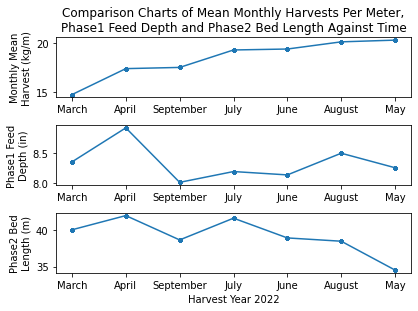

In [207]:
plt.subplot(3, 1, 1)
plt.plot(Harvest_Month,Monthly_Mean_Harvest, '.-')
plt.tight_layout()
plt.title('Comparison Charts of Mean Monthly Harvests Per Meter,\nPhase1 Feed Depth and Phase2 Bed Length Against Time')
plt.ylabel('Monthly Mean\nHarvest (kg/m)')

plt.subplot(3, 1, 2)
plt.plot(Harvest_Month,Phase1_Feed_Depth_cm, '.-')
plt.ylabel('Phase1 Feed\nDepth (in)')
plt.tight_layout()

#plt.subplot(3, 1, 3)
#plt.plot(Harvest_Month,Phase1_Loading_length, 'o-')
#plt.ylabel('Phase1_Loading_length (mg/d/yl)')

plt.subplot(3, 1, 3)
plt.plot(Harvest_Month, Phase2_Bed_length,  '.-')
plt.xlabel('Harvest Year 2022')
plt.ylabel('Phase2 Bed\nLength (m)')
#plt.tight_layout(pad=10000.0, w_pad=10000,h_pad=10000.0)
#plt.savefig('plt156mage.png', bbox_inches='tight')
plt.savefig('plt156mage.eps', bbox_inches='tight', format='eps', dpi=2000)
#plt.tight_layout()
#plt.xticks([4, 5, 6])
plt.show()

#plt.close(fig)

In [208]:
df13.head()

,N2 Spec Feeding Rate (mg/l/d),P Spec Feeding Rate (mg/l/d),N2 Spec Loading Density (mg/l/d),P Spec Loading Density (mg/l/d),Actual YL Quantity Loaded (#),Avg. YL Mass (mg),Actual N2 Feed Depth (cm),Actual Feed Quantity Loaded - N2 (Kgs),N2 Loading Length?,YL Loaded GIGO Score (%),N2 Bed Loading GIGO Score (%),10m Section N2 Bed Loading GIGO Score (%),N2 YL Harvest GIGO Score (%),N2- Actual Cycle Time (Hours),Mass of N2 Sample (g),Mass of pure N2 from Sample (g),Average Number of N2 in 1 g,Average Mass of N2 Larvae in Sample (mg),Actual Feed Quantity Loaded - P (Kgs),P Loaded Length (m),P Actual Feed Depth (cm),P YL GIGO Score (%),P Bed Loading GIGO Score (%),WL Harvest GIGO Score (%),P - Actual Cycle Time Hours,Quantity_harvested,Actual N2 Feeding rate (mg/YL-Day),N2-P Cycle,Total feed used (Kgs),N2 Formulation_Coke,N2 Formulation_F011,N2 Formulation_F077,N2 Formulation_Fanta,N2 Formulation_Fruit loops,N2 Formulation_Jelly tots,N2 Formulation_Miranda,N2 Formulation_Rossy,N2 Formulation_Sour worms,N2 Formulation_Sprite,N2 Formulation_Steri Stumpi,P Formulation_Alvaro,P Formulation_Batman,P Formulation_F005,P Formulation_F011,P Formulation_F076,P Formulation_Marigold,P Formulation_Powerade,P Formulation_Rockstar,P Formulation_Shortcake,P Formulation_Star trek,P Formulation_Steri Stumpi,P Formulation_Stoney,P Formulation_Sungold,P Formulation_Super M,P Formulation_Waridi,P Formulation_Yogi Sip,How N2 is being loaded?_Mechanical,N2 Transition Type _Harvest Separation and Refill,How P is being loaded?_Mechanical,N2 Purity Score (% Pure YL) Spec >=70%_Y,outlier,Total YL Mass Loaded (Kg)_per_m,target
0,65.0,110.0,200000.0,200000.0,17785000.0,2.36,8.6,5781.0,61.3,75.0,100.0,100.0,75.0,5.040,731.86,502.980,18.00,55.50,4402.0,46.0,8.00,67.0,96.4,95.0,2.942,787.4,64.5,8.3614,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0.912391,17.117391
1,65.0,110.0,200000.0,200000.0,17785000.0,2.31,8.6,5781.0,61.3,75.0,100.0,100.0,100.0,5.180,870.62,680.672,17.30,59.56,4402.0,46.0,7.70,67.0,98.2,100.0,2.840,920.0,62.8,8.1276,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1,0.893043,20.000000
2,65.0,110.0,200000.0,200000.0,17785000.0,2.33,8.4,5781.0,61.3,75.0,100.0,100.0,100.0,5.152,854.20,667.048,16.84,60.38,4402.0,46.0,7.48,67.0,98.2,100.0,2.850,780.4,63.1,8.1422,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1,0.900870,16.965217
3,65.0,110.0,200000.0,200000.0,4858044.0,2.37,8.0,1579.0,16.8,75.0,100.0,100.0,75.0,5.210,658.13,455.970,16.80,59.50,1486.5,12.6,7.60,67.0,82.0,100.0,2.966,493.2,62.4,8.0844,2781.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0.913492,39.142857
4,65.0,110.0,200000.0,200000.0,17785000.0,2.35,8.0,5781.0,61.3,75.0,100.0,100.0,75.0,5.120,735.68,502.810,15.90,62.90,4402.0,46.0,7.70,67.0,82.0,95.0,2.942,787.4,63.4,8.3614,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0.908478,17.117391


# Model Bulding 

In [209]:
#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [210]:
df13.head()

,N2 Spec Feeding Rate (mg/l/d),P Spec Feeding Rate (mg/l/d),N2 Spec Loading Density (mg/l/d),P Spec Loading Density (mg/l/d),Actual YL Quantity Loaded (#),Avg. YL Mass (mg),Actual N2 Feed Depth (cm),Actual Feed Quantity Loaded - N2 (Kgs),N2 Loading Length?,YL Loaded GIGO Score (%),N2 Bed Loading GIGO Score (%),10m Section N2 Bed Loading GIGO Score (%),N2 YL Harvest GIGO Score (%),N2- Actual Cycle Time (Hours),Mass of N2 Sample (g),Mass of pure N2 from Sample (g),Average Number of N2 in 1 g,Average Mass of N2 Larvae in Sample (mg),Actual Feed Quantity Loaded - P (Kgs),P Loaded Length (m),P Actual Feed Depth (cm),P YL GIGO Score (%),P Bed Loading GIGO Score (%),WL Harvest GIGO Score (%),P - Actual Cycle Time Hours,Quantity_harvested,Actual N2 Feeding rate (mg/YL-Day),N2-P Cycle,Total feed used (Kgs),N2 Formulation_Coke,N2 Formulation_F011,N2 Formulation_F077,N2 Formulation_Fanta,N2 Formulation_Fruit loops,N2 Formulation_Jelly tots,N2 Formulation_Miranda,N2 Formulation_Rossy,N2 Formulation_Sour worms,N2 Formulation_Sprite,N2 Formulation_Steri Stumpi,P Formulation_Alvaro,P Formulation_Batman,P Formulation_F005,P Formulation_F011,P Formulation_F076,P Formulation_Marigold,P Formulation_Powerade,P Formulation_Rockstar,P Formulation_Shortcake,P Formulation_Star trek,P Formulation_Steri Stumpi,P Formulation_Stoney,P Formulation_Sungold,P Formulation_Super M,P Formulation_Waridi,P Formulation_Yogi Sip,How N2 is being loaded?_Mechanical,N2 Transition Type _Harvest Separation and Refill,How P is being loaded?_Mechanical,N2 Purity Score (% Pure YL) Spec >=70%_Y,outlier,Total YL Mass Loaded (Kg)_per_m,target
0,65.0,110.0,200000.0,200000.0,17785000.0,2.36,8.6,5781.0,61.3,75.0,100.0,100.0,75.0,5.040,731.86,502.980,18.00,55.50,4402.0,46.0,8.00,67.0,96.4,95.0,2.942,787.4,64.5,8.3614,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0.912391,17.117391
1,65.0,110.0,200000.0,200000.0,17785000.0,2.31,8.6,5781.0,61.3,75.0,100.0,100.0,100.0,5.180,870.62,680.672,17.30,59.56,4402.0,46.0,7.70,67.0,98.2,100.0,2.840,920.0,62.8,8.1276,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1,0.893043,20.000000
2,65.0,110.0,200000.0,200000.0,17785000.0,2.33,8.4,5781.0,61.3,75.0,100.0,100.0,100.0,5.152,854.20,667.048,16.84,60.38,4402.0,46.0,7.48,67.0,98.2,100.0,2.850,780.4,63.1,8.1422,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1,0.900870,16.965217
3,65.0,110.0,200000.0,200000.0,4858044.0,2.37,8.0,1579.0,16.8,75.0,100.0,100.0,75.0,5.210,658.13,455.970,16.80,59.50,1486.5,12.6,7.60,67.0,82.0,100.0,2.966,493.2,62.4,8.0844,2781.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0.913492,39.142857
4,65.0,110.0,200000.0,200000.0,17785000.0,2.35,8.0,5781.0,61.3,75.0,100.0,100.0,75.0,5.120,735.68,502.810,15.90,62.90,4402.0,46.0,7.70,67.0,82.0,95.0,2.942,787.4,63.4,8.3614,10183.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0.908478,17.117391


In [211]:
#df13.rename(columns={'target':'quantity_harvested'}, inplace=True)

In [212]:
X = df13[['N2- Actual Cycle Time (Hours)','N2 Formulation_Coke','P Formulation_Super M','N2 Loading Length?','Total YL Mass Loaded (Kg)_per_m','P Loaded Length (m)','P Formulation_Batman','P - Actual Cycle Time Hours','N2 Purity Score (% Pure YL) Spec >=70%_Y','N2 Formulation_Sour worms','Average Number of N2 in 1 g','Actual N2 Feed Depth (cm)','Actual  N2 Feeding rate (mg/YL-Day)']]

In [213]:
X.columns

Index(['N2- Actual Cycle Time (Hours)', 'N2 Formulation_Coke',
       'P Formulation_Super M', 'N2 Loading Length?',
       'Total YL Mass Loaded (Kg)_per_m', 'P Loaded Length (m)',
       'P Formulation_Batman', 'P - Actual Cycle Time Hours',
       'N2 Purity Score (% Pure YL) Spec >=70%_Y', 'N2 Formulation_Sour worms',
       'Average Number of N2 in 1 g', 'Actual N2 Feed Depth (cm)',
       'Actual  N2 Feeding rate (mg/YL-Day)'],
      dtype='object')

## Renaming Key Columns for anonimity 

In [214]:
X.rename(columns = {'N2- Actual Cycle Time (Hours)':'Phase1 Cycle Time','N2 Formulation_Coke':'Phase1 Formulation C','P Formulation_Super M':'Phase2 Formulation SM', 'N2 Loading Length?':'Phase1 Loading length',
                    'P Loaded Length (m)':'Phase2 Laoded Length (m)','P Formulation_Batman':'Phase2 Formulation B', 'P - Actual Cycle Time Hours':'Phase2 Cycle Time','Actual  N2 Feeding rate (mg/YL-Day)':'Phase1 Feeding Rate',
                   'N2 Purity Score (% Pure YL) Spec >=70%_Y':'Phase1 Purity Score (% Pure YL) Spec >=70%_Y','N2 Formulation_Sour worms': 'Pahse1 Formulation SW', 'Average Number of N2 in 1 g': 'Average Number of in Phase1 per g','Actual N2 Feed Depth (cm)':'Phase 1 Feed Depth (cm)' }, inplace = True)

In [215]:
#Y=df13[['quantity_harvested']]

In [216]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

In [217]:
X_scaled.head()

,Phase1 Cycle Time,Phase1 Formulation C,Phase2 Formulation SM,Phase1 Loading length,Total YL Mass Loaded (Kg)_per_m,Phase2 Laoded Length (m),Phase2 Formulation B,Phase2 Cycle Time,Phase1 Purity Score (% Pure YL) Spec >=70%_Y,Pahse1 Formulation SW,Average Number of in Phase1 per g,Phase 1 Feed Depth (cm),Phase1 Feeding Rate
0,0.178092,0.789228,0.922085,0.588555,0.051031,0.550531,-0.317135,-0.446422,-1.453899,-0.50774,-0.045306,0.261542,-0.296128
1,0.471672,0.789228,-1.084498,0.588555,-0.046673,0.550531,-0.317135,-0.606278,0.687806,-0.50774,-0.148794,0.261542,-0.438839
2,0.412956,0.789228,-1.084498,0.588555,-0.007152,0.550531,-0.317135,-0.590606,0.687806,-0.50774,-0.216801,0.036341,-0.413655
3,0.534582,0.789228,0.922085,-2.198338,0.056590,-2.192409,-0.317135,-0.408808,-1.453899,-0.50774,-0.222714,-0.414061,-0.472419
4,0.345852,0.789228,0.922085,0.588555,0.031271,0.550531,-0.317135,-0.446422,-1.453899,-0.50774,-0.355771,-0.414061,-0.388471


In [218]:
## Splitting the data set
#Splitting the dataset into train and test datasets
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,shuffle=True,random_state=0)

In [219]:
#Checking the shape of the train and test data
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of Training set :  (612, 13)
Shape of test set :  (154, 13)


In [220]:
from sklearn.metrics import r2_score

In [221]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [222]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [223]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test, y_train,y_test):

    # Insample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )

OLS Model


In [224]:
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly.
x_train1 = sm.add_constant(x_train)
# Add constant to test data
x_test1 = sm.add_constant(x_test)

# create the model
olsmodel1 = sm.OLS(y_train, x_train1).fit()


In [225]:

# create the model
olsmodel1 = sm.OLS(y_train, x_train1).fit()

# get the model summary
olsmodel1.summary()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     51.27
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           2.60e-88
Time:                        10:01:53   Log-Likelihood:                -1702.4
No. Observations:                 612   AIC:                             3433.
Df Residuals:                     598   BIC:                             3495.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [226]:
lin_reg_test = model_performance_regression(olsmodel1, x_test1, y_test)
lin_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.809089,3.023474,0.673244,0.640334,18.542617


In [227]:
model_pref(olsmodel1, x_train1, x_test1,y_train,y_test)

    Data      RMSE       MAE       MAPE
0  Train  3.906929  2.965920  17.647451
1   Test  3.809089  3.023474  18.542617


In [228]:
#pip install regressormetricgraphplot

In [229]:
from regressormetricgraphplot import CompareModels
%matplotlib inline
#Metrics
#CompareModels.R2AndRMSE(y_test=y_test, y_pred=y_pred)
plot = CompareModels()

Linear Regression

In [230]:
# import the required function
from sklearn.model_selection import cross_val_score

# build the regression model using Sklearn Linear regression
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, x_train, y_train, cv = 10) #cv=10 represents data is divided into 10 folds.
cv_Score12 = cross_val_score(linearregression, x_train, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.443 (+/- 0.449)
Mean Squared Error: 16.810 (+/- 11.693)


In [231]:
linearregression.fit(x_train, y_train)
y_pred =linearregression.predict(x_test)
CompareModels.R2AndRMSE(y_test=y_test, y_pred=y_pred)
plot.add(model_name='Linear Regression', y_test=y_test, y_pred=y_pred)

Ridge Regression


In [232]:
from sklearn.linear_model import Ridge

In [233]:
rdg = Ridge()

In [234]:
rdg.fit(x_train, y_train)
model_pref(rdg, x_train, x_test,y_train,y_test)

    Data      RMSE       MAE       MAPE
0  Train  3.907849  2.970014  17.663730
1   Test  3.822995  3.039819  18.602262


In [235]:
ridge_regression_perf_test= model_performance_regression(rdg, x_test, y_test)

In [236]:
CompareModels.R2AndRMSE(y_test=y_test, y_pred=y_pred)
y_pred = rdg.predict(x_test)
plot.add(model_name='Ridge Regression', y_test=y_test, y_pred=y_pred)

#y_pred = rdg.predict(x_test)

#### General Linear Model

In [237]:
# GLM 
from sklearn.linear_model import PoissonRegressor
glm = PoissonRegressor()


In [238]:
glm.fit(x_train, y_train)
model_pref(glm, x_train, x_test,y_train,y_test)

    Data      RMSE       MAE       MAPE
0  Train  3.899909  2.956150  17.637873
1   Test  3.851672  3.085083  18.679740


In [239]:
glm_perf_test = model_performance_regression(glm, x_test, y_test)

glm_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.851672,3.085083,0.665898,0.634874,18.67974


In [240]:
from sklearn.tree import DecisionTreeRegressor

#### Random Forest Regressor

In [241]:
#Random Forest Regressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)

#Fitting the model
regressor.fit(x_train, y_train)

# Model Performance on test data i.e prediction
regressor_perf_test = model_performance_regression(regressor, x_test, y_test)

regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.890078,2.194983,0.811895,0.794428,14.512152


### Comparative Model analysis with Preveious Studies

In [242]:
models_test_comp_df = pd.concat(
    [
        lin_reg_test.T,
        ridge_regression_perf_test.T,
        glm_perf_test.T,
        regressor_perf_test.T,
        

    ],
    axis=1,
)

models_test_comp_df.columns = [
    "Statistical Model (OLS)",
    "Linear Regression",
    "General Linear Model",
    "Random Forest regressor"]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Statistical Model (OLS),Linear Regression,General Linear Model,Random Forest regressor
RMSE,3.809089,3.822995,3.851672,2.890078
MAE,3.023474,3.039819,3.085083,2.194983
R-squared,0.673244,0.670854,0.665898,0.811895
Adj. R-squared,0.640334,0.640291,0.634874,0.794428
MAPE,18.542617,18.602262,18.679740,14.512152


### Visual Copmarison

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


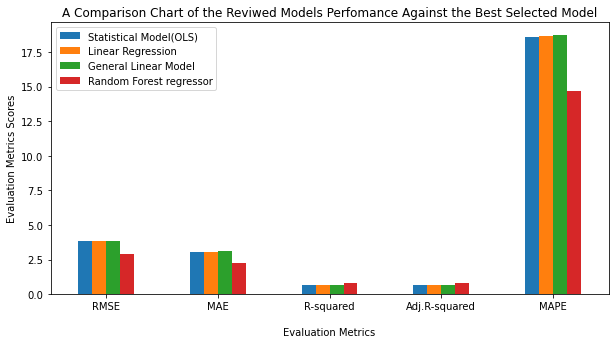

In [243]:
Statistical_Model= [3.818960,3.027252,0.671549,0.638467,18.587188]
Linear_Regression=[3.832344,3.043502,0.669242, 0.638529,18.645440]
Random_Forest_regressor=[2.912162,2.221066,0.809009,0.791275,14.661590]
General_Linear_Model=[3.855807, 3.087771,0.665180,0.634089,18.712122]
Index=['RMSE','MAE', 'R-squared','Adj.R-squared','MAPE']
dqy = pd.DataFrame({'Statistical Model(OLS)':Statistical_Model,
                   'Linear Regression':Linear_Regression,
                   'General Linear Model':General_Linear_Model,
                   'Random Forest regressor':Random_Forest_regressor}, index=Index)
ax = dqy.plot.bar(rot=0, figsize=(10, 5))
#ax.labelsize=(600)
#ax.fontsize=(950)
#ax.legend(prop={"size":18})
ax.set_title('A Comparison Chart of the Reviwed Models Perfomance Against the Best Selected Model')
ax.set_xlabel('\nEvaluation Metrics')
ax.set_ylabel('Evaluation Metrics Scores')
#plt.savefig('plt1621mage.pdf')
plt.savefig('plt1621mage.eps', bbox_inches='tight', format='eps', dpi=2000)

In [244]:
# Metrics
#CompareModels.R2AndRMSE(y_test=y_test, y_pred=y_pred)

In [245]:
#plot = CompareModels()

In [246]:
#plot.add(model_name='Ridge Regression', y_test=y_test, y_pred=y_pred)

In [247]:
#import matplotlib as mpl
#import matplotlib.pyplot as plt
#import numpy as np

In [248]:

#plot.show(figsize=(10, 5), title=('Model Peformance Comparison Chart'), xlabel=('Evaluation Metrics'), ylabel=('Metrics Score'))

In [249]:
olsmodel1 = sm.OLS(y_train, x_train1).fit()
y_pred =olsmodel1.predict(x_test1)

In [250]:
#plot.add(model_name='Decision tree regressor', y_test=y_test, y_pred=y_pred)

In [251]:
ridge_regression_perf_test = model_performance_regression(rdg, x_test, y_test)

ridge_regression_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.822995,3.039819,0.670854,0.640291,18.602262


Decision Tree Regressor 


In [252]:
from sklearn.tree import DecisionTreeRegressor

In [253]:
#Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state = 1)

#Fitting the model
dt_regressor.fit(x_train,y_train)

# Model Performance on test data i.e prediction
dt_regressor_perf_test = model_performance_regression(dt_regressor, x_test, y_test)

dt_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.913432,2.936763,0.655097,0.623071,19.577218


In [254]:
CompareModels.R2AndRMSE(y_test=y_test, y_pred=y_pred)
y_pred =dt_regressor.predict(x_test)
plot.add(model_name='Decision tree regressor', y_test=y_test, y_pred=y_pred)

In [255]:
#y_pred =dt_regressor.predict(x_test)

In [256]:
#plot.add(model_name='Linear reggresion', y_test=y_test, y_pred=y_pred)

In [257]:
from sklearn.metrics import fbeta_score, make_scorer

In [258]:
from sklearn.model_selection import GridSearchCV

Tuning the Decision Tree


In [259]:
# Choose the type of regressor 
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,8), 
              'criterion': ['squared_error', 'friedman_mse'],
              'min_samples_leaf': [1, 3, 5, 7],
              'max_leaf_nodes' : [2, 5, 7] + [None]
             }


# Type of scoring used to compare parameter combinations
scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(x_train,y_train)

# Set the dtree_tuned_regressor to the best combination of parameters
dtree_tuned_regressor = grid_obj.best_estimator_

dtree_tuned_regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=7, min_samples_leaf=7,
                      random_state=1)

In [260]:
#Get the score of tuned decision tree regressor
dtree_tuned_regressor_perf_test = model_performance_regression(dtree_tuned_regressor, x_test, y_test)
dtree_tuned_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.133817,2.446266,0.778829,0.758292,16.252945


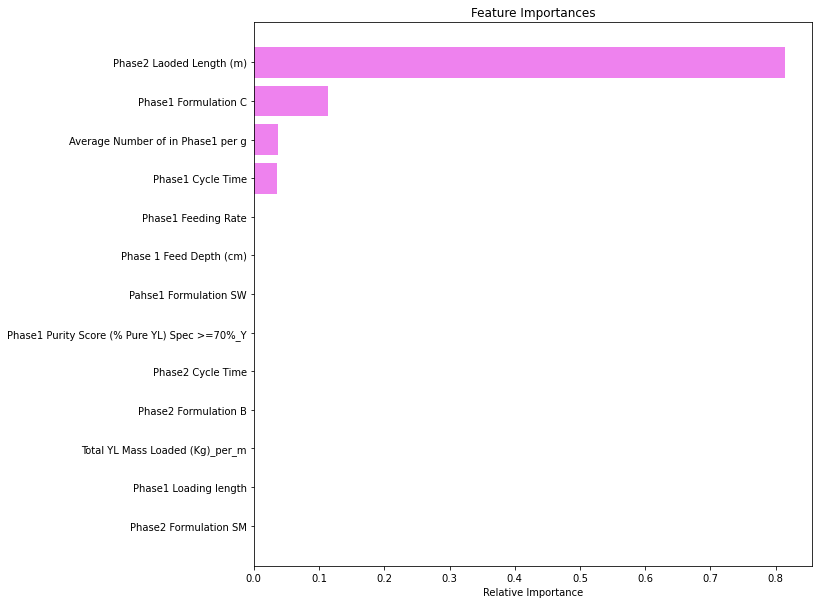

In [261]:
#Plotting the feature importance
features = list(X.columns)
importances = dtree_tuned_regressor.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Bagging Regressor 


In [262]:
from sklearn.ensemble import BaggingRegressor

In [263]:
#Bagging Regressor
bagging_estimator=BaggingRegressor(random_state=1)

#Fitting the model
bagging_estimator.fit(x_train,y_train)

# Model Performance on test data i.e prediction
bagging_estimator_perf_test = model_performance_regression(bagging_estimator, x_test, y_test)

bagging_estimator_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.015586,2.34563,0.795203,0.776186,15.32204


In [264]:
CompareModels.R2AndRMSE(y_test=y_test, y_pred=y_pred)
y_pred =bagging_estimator.predict(x_test)
plot.add(model_name='Bagging regressor', y_test=y_test, y_pred=y_pred)

In [265]:
#y_pred =bagging_estimator.predict(x_test)
#plot.add(model_name='Bagging regressor', y_test=y_test, y_pred=y_pred)

Tuning the BaggingRegressor

In [266]:
# Choose the type of regressor. 
bagging_tuned = BaggingRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [10,15,20],
              "max_samples" : [0.8,1],
              "max_features" : [0.8,1]
             }


# Type of scoring used to compare parameter combinations
scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned , parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(x_train,y_train)

# Set the bagging_tuned_regressor to the best combination of parameters
bagging_tuned_regressor = grid_obj.best_estimator_

bagging_tuned_regressor.fit(x_train, y_train)
BaggingRegressor(max_features=0.8, max_samples=0.8, n_estimators=15,
                 random_state=1)

BaggingRegressor(max_features=0.8, max_samples=0.8, n_estimators=15,
                 random_state=1)

In [267]:
#Get the score of tuned Bagging tree regressor
bagging_tuned_regressor_perf_test = model_performance_regression(bagging_tuned_regressor, x_test, y_test)
bagging_tuned_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.916225,2.290037,0.808476,0.790692,14.613899


Random Forest


In [268]:
#Random Forest Regressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)

#Fitting the model
regressor.fit(x_train, y_train)

# Model Performance on test data i.e prediction
regressor_perf_test = model_performance_regression(regressor, x_test, y_test)

regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.890078,2.194983,0.811895,0.794428,14.512152


In [269]:
CompareModels.R2AndRMSE(y_test=y_test, y_pred=y_pred)
y_pred =regressor.predict(x_test)
plot.add(model_name='Random Forest Regressor', y_test=y_test, y_pred=y_pred)

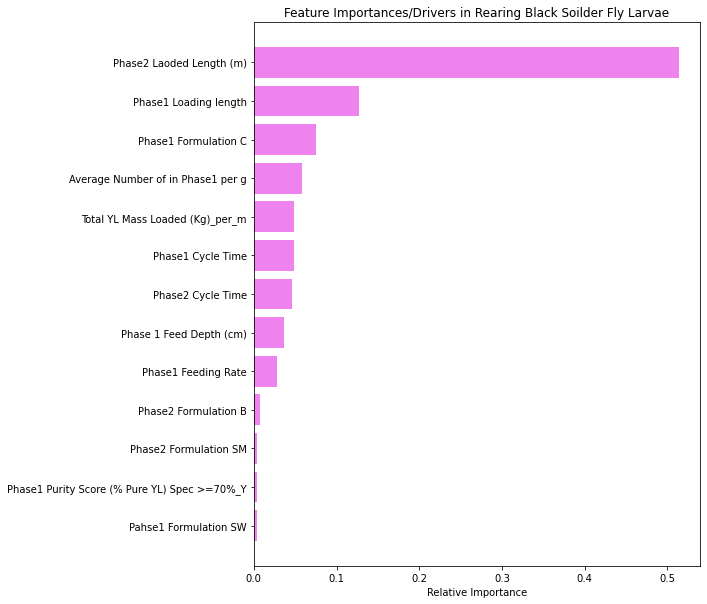

In [270]:
importances = regressor.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,10))
plt.title('Feature Importances/Drivers in Rearing Black Soilder Fly Larvae')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('plt125mage.eps', bbox_inches='tight', format='eps', dpi=2000)
plt.show()

In [271]:
#y_pred =regressor.predict(x_test)
#plot.add(model_name='Random Forest Regressor', y_test=y_test, y_pred=y_pred)

Tuning the Randome Forest

In [272]:
rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [5, 7],
    "max_features": [0.8, 1]
             }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(x_train,y_train)

# Set the rf_tuned_regressor to the best combination of parameters
rf_tuned_regressor = grid_obj.best_estimator_

rf_tuned_regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=7, max_features=0.8, n_estimators=120,
                      random_state=1)

In [273]:
 #Model Performance on test data i.e prediction
rf_tuned_regressor_perf_test = model_performance_regression(rf_tuned_regressor, x_test, y_test)

rf_tuned_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.89063,2.226983,0.811823,0.79435,14.791379


Comparing the Performance of the Models Built so Far

In [274]:
models_test_comp_df = pd.concat(
    [
        lin_reg_test.T,
        ridge_regression_perf_test.T,
        dt_regressor_perf_test.T,
        regressor_perf_test.T,
        bagging_estimator_perf_test.T,
        dtree_tuned_regressor_perf_test.T,
        bagging_tuned_regressor_perf_test.T,
        rf_tuned_regressor_perf_test.T
    ],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression",
    "Ridge Regression",
    "Decision tree regressor",
    "Random Forest regressor",
    "Bagging regressor",
    "Tuned Decision Tree regressor",
    "Tuned Bagging Tree regressor",
    "Tuned Random Forest Regressor"]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression,Ridge Regression,Decision tree regressor,Random Forest regressor,Bagging regressor,Tuned Decision Tree regressor,Tuned Bagging Tree regressor,Tuned Random Forest Regressor
RMSE,3.809089,3.822995,3.913432,2.890078,3.015586,3.133817,2.916225,2.890630
MAE,3.023474,3.039819,2.936763,2.194983,2.345630,2.446266,2.290037,2.226983
R-squared,0.673244,0.670854,0.655097,0.811895,0.795203,0.778829,0.808476,0.811823
Adj. R-squared,0.640334,0.640291,0.623071,0.794428,0.776186,0.758292,0.790692,0.794350
MAPE,18.542617,18.602262,19.577218,14.512152,15.322040,16.252945,14.613899,14.791379


In [275]:
final_model = RandomForestRegressor(max_depth=7, max_features=0.8, n_estimators=120,
                      random_state=1)
final_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=7, max_features=0.8, n_estimators=120,
                      random_state=1)

In [276]:
final_model_perf_train = model_performance_regression(final_model, x_train, y_train)
final_model_perf_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.23205,1.750108,0.845652,0.842296,11.025304


In [277]:
final_model_test_perf = model_performance_regression(final_model, x_test, y_test)
print("Test Performance:")
final_model_test_perf

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.89063,2.226983,0.811823,0.79435,14.791379


Current final model doing well but it is overfitting 

In [278]:
#importing the AdaBoostRegressor and GradientBoostingRegressor [Boosting]
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [279]:
#importing the XGBReressor from the xgboost
from xgboost import XGBRegressor

Adaboost Regressor 

In [280]:
#Adaboost Regressor
adaboost_model = AdaBoostRegressor(random_state=1)

#Fitting the model
adaboost_model.fit(x_train,y_train)

# model Performance on test data i.e prediction
adaboost_model_perf_test = model_performance_regression(adaboost_model, x_test, y_test)

adaboost_model_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.212586,2.571747,0.767571,0.745988,16.920913


In [281]:
CompareModels.R2AndRMSE(y_test=y_test, y_pred=y_pred)
y_pred =adaboost_model.predict(x_test)
plot.add(model_name='Adaboost regressor', y_test=y_test, y_pred=y_pred)

In [282]:
adaboost_model_perf_train = model_performance_regression(adaboost_model, x_train, y_train)

adaboost_model_perf_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.974379,2.434919,0.725914,0.719955,15.342693


In [283]:
adaboost_model_perf_test = model_performance_regression(adaboost_model, x_test, y_test)

adaboost_model_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.212586,2.571747,0.767571,0.745988,16.920913


Gradient Boost Regressor

In [284]:
#Gradient Boost Regressor
gbc = GradientBoostingRegressor(random_state=1)
gbc.fit(x_train,y_train)
gbc_perf_test = model_performance_regression(gbc, x_test, y_test)
gbc_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.815545,2.196813,0.821472,0.804895,14.412152


#### Observation
- model doing well but overfittting (not generaizable)

In [285]:
#y_pred =gbc.predict(x_test)
#plot.add(model_name='Gradientboost regressor', y_test=y_test, y_pred=y_pred)

In [286]:
#XGBoost Regressor
xgb = XGBRegressor(random_state=1, eval_metric='logloss')
xgb.fit(x_train,y_train)
xgb_perf_test = model_performance_regression(xgb, x_test, y_test)
xgb_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.891846,2.200855,0.811665,0.794177,13.8681


In [287]:
CompareModels.R2AndRMSE(y_test=y_test, y_pred=y_pred)
y_pred =xgb.predict(x_test)
plot.add(model_name='XGBoost regressor', y_test=y_test, y_pred=y_pred)

In [288]:
models_test_comp_df = pd.concat(
    [
        lin_reg_test.T,
        ridge_regression_perf_test.T,
        dt_regressor_perf_test.T,
        regressor_perf_test.T,
        bagging_estimator_perf_test.T,
        adaboost_model_perf_test.T,
        xgb_perf_test.T

    ],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression",
    "Ridge Regression",
    "Decision tree regressor",
    "Random Forest regressor",
    "Bagging regressor",
    "Adaboost regressor",
    "XGBoost regressor"
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression,Ridge Regression,Decision tree regressor,Random Forest regressor,Bagging regressor,Adaboost regressor,XGBoost regressor
RMSE,3.809089,3.822995,3.913432,2.890078,3.015586,3.212586,2.891846
MAE,3.023474,3.039819,2.936763,2.194983,2.345630,2.571747,2.200855
R-squared,0.673244,0.670854,0.655097,0.811895,0.795203,0.767571,0.811665
Adj. R-squared,0.640334,0.640291,0.623071,0.794428,0.776186,0.745988,0.794177
MAPE,18.542617,18.602262,19.577218,14.512152,15.322040,16.920913,13.868100


In [289]:
models_test_comp_df.T

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
Linear Regression,3.809089,3.023474,0.673244,0.640334,18.542617
Ridge Regression,3.822995,3.039819,0.670854,0.640291,18.602262
Decision tree regressor,3.913432,2.936763,0.655097,0.623071,19.577218
Random Forest regressor,2.890078,2.194983,0.811895,0.794428,14.512152
Bagging regressor,3.015586,2.345630,0.795203,0.776186,15.322040
Adaboost regressor,3.212586,2.571747,0.767571,0.745988,16.920913
XGBoost regressor,2.891846,2.200855,0.811665,0.794177,13.868100


In [290]:
#!pip install regressormetricgraphplot

In [291]:
#from regressormetricgraphplot import CompareModels
#%matplotlib inline

In [292]:
df13.columns

Index(['N2 Spec Feeding Rate (mg/l/d)', 'P Spec Feeding Rate (mg/l/d)',
       'N2 Spec Loading Density (mg/l/d)', 'P Spec Loading Density (mg/l/d)',
       'Actual YL Quantity Loaded (#)', 'Avg. YL Mass (mg)',
       'Actual N2 Feed Depth (cm)', 'Actual Feed Quantity Loaded - N2 (Kgs)',
       'N2 Loading Length?', 'YL Loaded  GIGO Score (%)',
       'N2 Bed Loading GIGO Score (%)',
       '10m Section N2 Bed Loading GIGO Score (%)',
       'N2 YL Harvest GIGO Score (%)', 'N2- Actual Cycle Time (Hours)',
       'Mass of N2 Sample (g)', 'Mass of pure N2 from Sample (g)',
       'Average Number of N2 in 1 g',
       'Average Mass of N2 Larvae in Sample  (mg)',
       'Actual Feed Quantity Loaded - P (Kgs)', 'P Loaded Length (m)',
       'P Actual Feed Depth (cm)', 'P YL GIGO Score (%)',
       'P Bed Loading GIGO Score (%)', 'WL Harvest GIGO Score (%)',
       'P - Actual Cycle Time Hours', 'Quantity_harvested',
       'Actual  N2 Feeding rate (mg/YL-Day)', 'N2-P Cycle',
       'Total f

## Furhter Analysis to Compare Maximum and Minimum Production for Optimzed Production 

In [293]:
df15 =df13[['N2- Actual Cycle Time (Hours)','N2 Formulation_Coke','P Formulation_Super M','N2 Loading Length?','Total YL Mass Loaded (Kg)_per_m','P Loaded Length (m)','P Formulation_Batman','P - Actual Cycle Time Hours','N2 Purity Score (% Pure YL) Spec >=70%_Y','N2 Formulation_Sour worms','Average Number of N2 in 1 g','Actual N2 Feed Depth (cm)','Actual  N2 Feeding rate (mg/YL-Day)','target']]

In [294]:
df15['target'].argmax()

243

In [295]:
df15.iloc[243]

N2- Actual Cycle Time (Hours)                5.190000
N2 Formulation_Coke                          1.000000
P Formulation_Super M                        1.000000
N2 Loading Length?                          13.900000
Total YL Mass Loaded (Kg)_per_m              0.853333
P Loaded Length (m)                         10.500000
P Formulation_Batman                         0.000000
P - Actual Cycle Time Hours                  3.380000
N2 Purity Score (% Pure YL) Spec >=70%_Y     1.000000
N2 Formulation_Sour worms                    0.000000
Average Number of N2 in 1 g                 17.100000
Actual N2 Feed Depth (cm)                    8.500000
Actual  N2 Feeding rate (mg/YL-Day)         62.600000
target                                      48.380952
Name: 243, dtype: float64

In [296]:
df15['target'].argmin()

757

In [297]:
df15.iloc[757]

N2- Actual Cycle Time (Hours)                6.000000
N2 Formulation_Coke                          0.000000
P Formulation_Super M                        0.000000
N2 Loading Length?                          56.000000
Total YL Mass Loaded (Kg)_per_m              0.826087
P Loaded Length (m)                         46.000000
P Formulation_Batman                         0.000000
P - Actual Cycle Time Hours                  5.935000
N2 Purity Score (% Pure YL) Spec >=70%_Y     0.000000
N2 Formulation_Sour worms                    1.000000
Average Number of N2 in 1 g                 21.700000
Actual N2 Feed Depth (cm)                    7.100000
Actual  N2 Feeding rate (mg/YL-Day)         46.200000
target                                       5.793478
Name: 757, dtype: float64

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


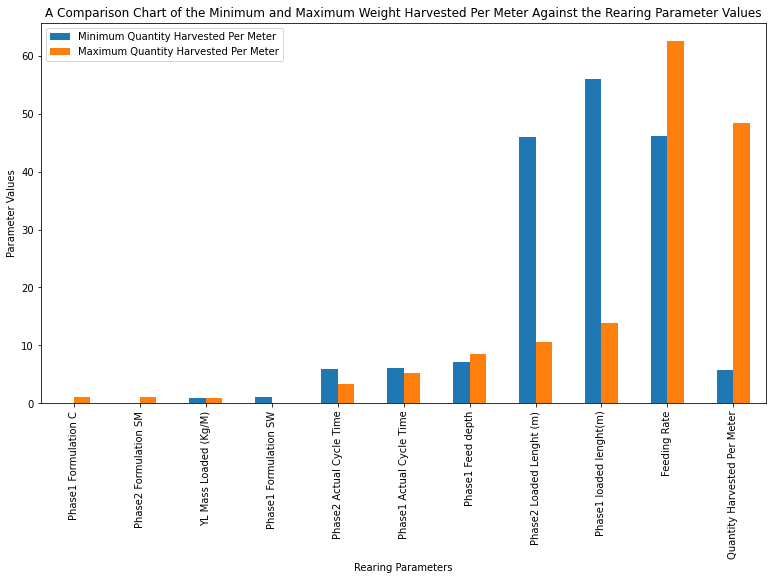

In [298]:
Minimum_Quantity_Harvested_Per_Meter= [0.0,0.0,0.83,1.0,5.93,6.0, 7.1, 46.0, 56.0,46.2, 5.79]
Maximum_Quantity_Harvested_Per_Meter=[1.0,1.0,0.85, 0.0,3.38,5.19,8.5,10.5,13.9,62.6,48.38]
Index = ['Phase1 Formulation C','Phase2 Formulation SM', 'YL Mass Loaded (Kg/M)','Phase1 Formulation SW','Phase2 Actual Cycle Time', 
        'Phase1 Actual Cycle Time', 'Phase1 Feed depth', 'Phase2 Loaded Lenght (m)', 'Phase1 loaded lenght(m)', 'Feeding Rate','Quantity Harvested Per Meter']
dqy = pd.DataFrame({'Minimum Quantity Harvested Per Meter': Minimum_Quantity_Harvested_Per_Meter,
                   'Maximum Quantity Harvested Per Meter': Maximum_Quantity_Harvested_Per_Meter}, index=Index)
ax = dqy.plot.bar(rot=0, figsize=(13, 7))
#ax.labelsize=(600)
#ax.fontsize=(950)
#ax.legend(prop={"size":18})
ax.set_title('A Comparison Chart of the Minimum and Maximum Weight Harvested Per Meter Against the Rearing Parameter Values')
ax.set_xlabel('Rearing Parameters')
plt.xticks(rotation=90)
ax.set_ylabel('Parameter Values')
#plt.savefig('C:\\Users\\JOHN\\Downloads\\plt167mage.pdf')
plt.savefig('plt167mage.eps', bbox_inches='tight', format='eps', dpi=2000)

<Figure size 432x288 with 0 Axes>

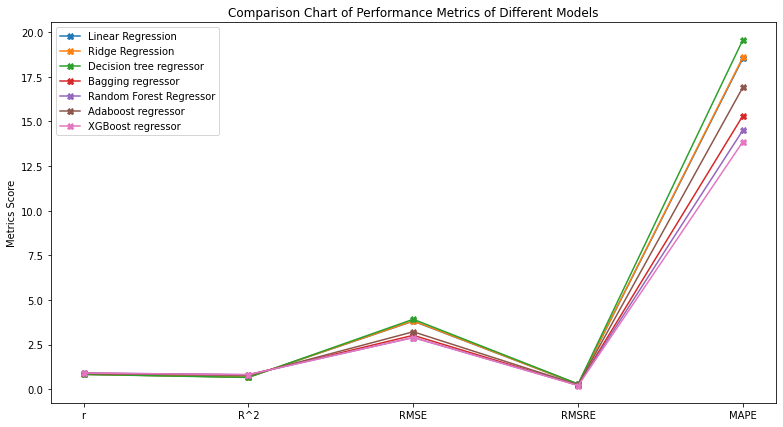

In [299]:
#plt.savefig('graph_model_performance.eps', bbox_inches='tight', format='eps', dpi=2000)
plt.savefig('graph_model_performance.jpg', bbox_inches='tight')
plot.show(figsize=(13, 7), title=('Comparison Chart of Performance Metrics of Different Models'), 
          xlabel=('Evaluation Metrics'), ylabel=('Metrics Score'))
